In [659]:
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import glob
from matplotlib.pyplot import figure
from os.path import expanduser
home = expanduser("~")
from pymatgen.analysis.ferroelectricity.polarization import Polarization
from pymatgen.util.coord import get_angle
from pymatgen.core.structure import Structure
from pymatgen.core.structure import Lattice
import pymatgen.io.vasp.outputs as vo
from pymatgen.io.vasp.outputs import Outcar
import warnings
warnings.filterwarnings('ignore')
homedir = os.path.expanduser('~')

In [316]:
def pol_plot_ab(structsAB, outcarsAB):
    C = 1.602176634E-19*1E+6/1E-16 # from dipole moment to µC/cm^2
    p_tots = []
    volumes_ab = []
    areas_ab = []
    lat_c = []
    angles = []
    energies = []
    for i in range(len(structsAB)):
        volumes_ab.append(structsAB[i].volume)
        lat_c.append(structsAB[i].as_dict()['lattice']['c'])
        p_tots.append(outcarsAB[i].p_elec + outcarsAB[i].p_ion)
        angle = structsAB[i].as_dict()['lattice']['gamma']
        angles.append(angle)
        areas_ab.append(np.sin(angle/180*np.pi)*(structsAB[i].as_dict()['lattice']['a']*structsAB[i].as_dict()['lattice']['b']))
        energies.append(outcarsAB[i].final_energy)
    
    pols_ab = np.array([p_tots[i][2]*C/volumes_ab[i] for i in range(len(p_tots))])
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    ax.plot(angles, pols_ab, 'o--', label='$ab$ shear')
    ax.set_xlabel('$\\theta$ ($^o$)')
    ax.set_ylabel('$P_z$ (µC/cm$^2$)')
    ax.invert_xaxis()
    plt.legend()
    print()
    print(np.round(pols_ab, 3))

    fig, ax = plt.subplots(2,2, figsize=(20,8))
    ax[0][0].plot(angles, energies, '*--')
    ax[0][0].invert_xaxis()
    ax[0][0].set_title("Total energy (eV per supercell)")
    ax[0][1].plot(angles, volumes_ab, '*--')
    ax[0][1].invert_xaxis()
    ax[0][1].set_title("Volume")
    ax[1][0].plot(angles, areas_ab, '*--')
    ax[1][0].invert_xaxis()
    ax[1][0].set_title("Area")
    ax[1][1].plot(angles, lat_c, '*--')
    ax[1][1].invert_xaxis()
    ax[1][1].set_title("Lat const c")

    return pols_ab, angles, energies, lat_c, areas_ab, volumes_ab

In [331]:
def pol_plot_ac(structsAC, outcarsAC):
    C = 1.602176634E-19*1E+6/1E-16 # from dipole moment to µC/cm^2
    p_tots = []
    volumes_ac = []
    areas_ac = []
    lat_b = []
    angles = []
    energies = []
    for i in range(len(structsAC)):
        volumes_ac.append(structsAC[i].volume)
        lat_b.append(structsAC[i].as_dict()['lattice']['b'])
        p_tots.append(outcarsAC[i].p_elec + outcarsAC[i].p_ion)
        angle = structsAC[i].as_dict()['lattice']['beta']
        angles.append(angle)
        areas_ac.append(np.sin(angle/180*np.pi)*(structsAC[i].as_dict()['lattice']['a']*structsAC[i].as_dict()['lattice']['c']))
        energies.append(outcarsAC[i].final_energy)
    
    pols_ac = np.array([p_tots[i][1]*C/volumes_ac[i] for i in range(len(p_tots))])
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots()
    ax.plot(angles, pols_ac, 'o--', label='$ac$ shear')
    ax.set_xlabel('$\\theta$ ($^o$)')
    ax.set_ylabel('$P_y$ (µC/cm$^2$)')
    ax.invert_xaxis()
    plt.legend()
    print()
    print(np.round(pols_ac, 3))

    fig, ax = plt.subplots(2,2, figsize=(20,8))
    ax[0][0].plot(angles, energies, '*--')
    ax[0][0].invert_xaxis()
    ax[0][0].set_title("Total energy (eV per supercell)")
    ax[0][1].plot(angles, volumes_ac, '*--')
    ax[0][1].invert_xaxis()
    ax[0][1].set_title("Volume")
    ax[1][0].plot(angles, areas_ac, '*--')
    ax[1][0].invert_xaxis()
    ax[1][0].set_title("Area")
    ax[1][1].plot(angles, lat_b, '*--')
    ax[1][1].invert_xaxis()
    ax[1][1].set_title("Lat const b")

    return angles, energies, lat_b, areas_ac, volumes_ac

## Polarization normal to ab plane using intermediate helper structures. Tetragonal taken as non-polar.

In [269]:
ab_angles = [90]
ab_pols = [0.0]

### 89 ab shear, rlx

In [572]:
cell_volume_ab = np.array([1151.2831, 1150.9097, 1150.2817, 1149.5488, 1148.5359, 1147.3123, 
                           1145.8804, 1144.2259, 1142.3764, 1140.3727, 1138.1569])/4
areas_ab = np.array([110.5849, 110.4923, 110.3830, 110.2569, 110.1141, 109.9545, 
                     109.7781, 109.5849, 109.3750, 109.1483, 108.9049])/4
angles_ab = [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80]

latcon_c = np.array([10.4109, 10.4162, 10.4208, 10.4261, 10.4304, 
                  10.4344, 10.4382, 10.4415, 10.4446, 10.4479, 10.4509])/2

latcon_b = np.array([10.5159, 10.5162, 10.5171, 10.5188, 10.5207, 10.5226, 
                     10.5259, 10.5304, 10.5359, 10.5418, 10.5488])/2

In [596]:
cell_volume_ac = np.array([1151.2831, 1151.1387, 1150.7031, 1150.0172, 1148.9995, 1147.6256, 
                          1146.0637, 1144.2740, 1142.2456, 1139.9082, 1137.3354])/4
areas_ac = np.array([109.4799, 109.4632, 109.4131, 109.3297, 109.2131, 109.0633, 108.8800, 
                    108.6637, 108.4143, 108.1319, 107.8166])/4

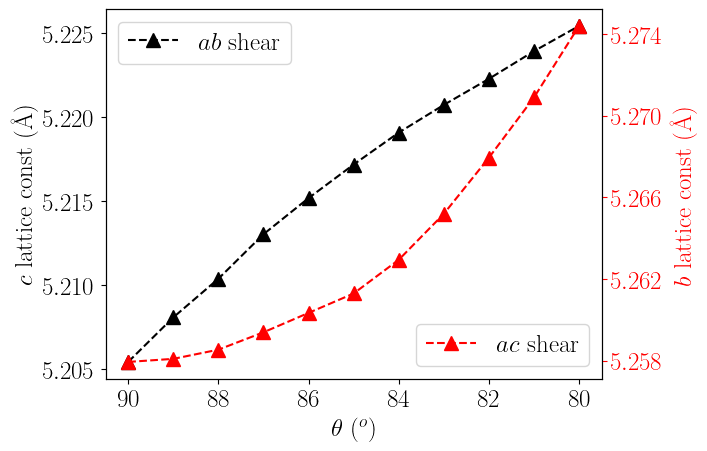

In [616]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(angles_ab, latcon_c, 'k^--', markersize=10, label="$ab$ shear")
ax2.plot(angles_ab, latcon_b, 'r^--', markersize=10, label="$ac$ shear")

ax1.set_xlabel('$\\theta$ ($^o$)')
ax1.set_ylabel('$c$ lattice const (Å)', color='black')
ax2.set_ylabel('$b$ lattice const (Å)', color='red')
ax1.tick_params(axis='y', colors='black')
ax2.tick_params(axis='y', colors='red')
ax2.set_yticks([5.258, 5.262, 5.266, 5.270, 5.274])
ax1.invert_xaxis()
ax1.legend(loc="upper left")#, bbox_to_anchor=(1.6, 1), ncol= 1)
ax2.legend(loc="lower right")
plt.show()

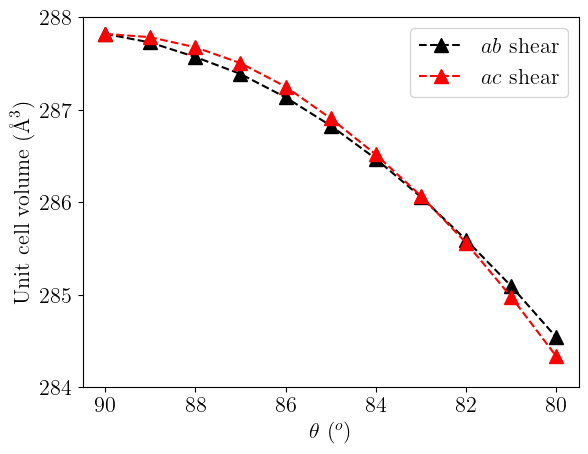

In [609]:
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(angles_ab, cell_volume_ab, 'k^--', markersize=10, label="$ab$ shear")
ax1.plot(angles_ab, cell_volume_ac, 'r^--', markersize=10, label="$ac$ shear")
#ax2.plot(angles_ab, areas_ab, 'k^:', markersize=7)
#ax2.plot(angles_ab, areas_ac, 'r^:', markersize=7)

ax1.set_xlabel('$\\theta$ ($^o$)')
ax1.set_ylabel('Unit cell volume (Å$^3$)')#, color='black')
#ax2.set_ylabel("In-plane area (Å$^2$)")#, color='r')
ax1.set_yticks([288, 287, 286, 285, 284])
#ax2.set_yticks([3.72, 3.73, 3.74, 3.75, 3.76, 3.77])
#ax1.yaxis.label.set_color('blue')
#ax2.yaxis.label.set_color('red')
ax1.tick_params(axis='y')#, colors='black')
#ax2.tick_params(axis='y')#, colors='red')
ax1.invert_xaxis()
#os.chdir(f'/home/ubuntu/nn9301k')
ax1.legend()
#plt.savefig(f'params.pdf', format="pdf", bbox_inches="tight")
plt.show()

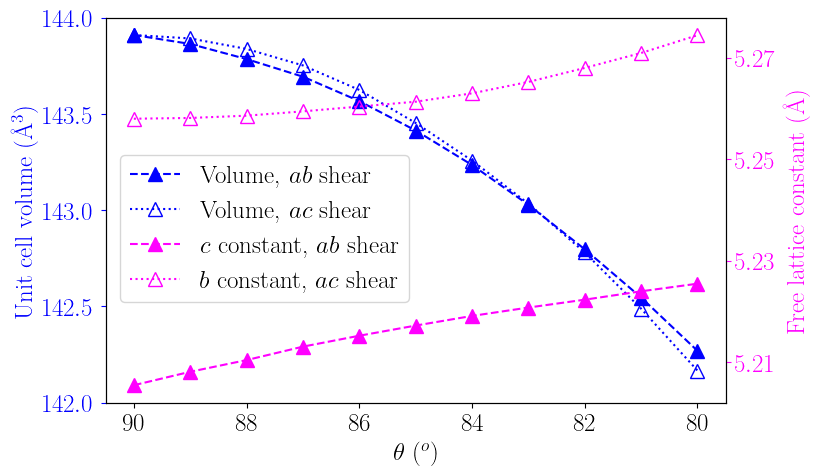

In [657]:
fig, (ax1) = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
        "font.weight": "normal",
        "font.style": "normal",
    "mathtext.default": "regular"
    })

clr1 = "blue"
clr2 = "magenta"
ax1.plot(angles_ab, cell_volume_ab/2, 'b^--', markersize=10, label="Volume, $ab$ shear")
ax1.plot(angles_ab, cell_volume_ac/2, 'b^:', markersize=10, markerfacecolor='none', label="Volume, $ac$ shear")
ax2.plot(angles_ab, latcon_c, '^--', color = clr2, markersize=10, label="$c$ constant, $ab$ shear")
ax2.plot(angles_ab, latcon_b, '^:', color = clr2, markersize=10, markerfacecolor='none', label="$b$ constant, $ac$ shear")

ax1.set_xlabel('$\\theta$ ($^o$)')
ax1.set_ylabel('Unit cell volume (Å$^3$)', color = clr1)
ax1.set_yticks([142, 142.5, 143, 143.5, 144])
ax1.invert_xaxis()
ax2.set_ylabel('Free lattice constant (Å)', color = clr2)
ax1.tick_params(axis='y', colors = clr1)
ax2.tick_params(axis='y', colors = clr2)
ax2.set_yticks(np.arange(5.21, 5.28, 0.02))

labels = []
hndls = []
for ax in fig.axes:
    hndl, lbl = ax.get_legend_handles_labels()
    for i in zip(hndl, lbl):
        hndls.append(i[0])
        labels.append(i[1])
fig.legend(hndls, labels, bbox_to_anchor=(0.52, 0.63), ncol= 1)
plt.savefig(f'{homedir}/nn9301k/volume_lat_param_shear.pdf', format="pdf", bbox_inches="tight")
plt.show()

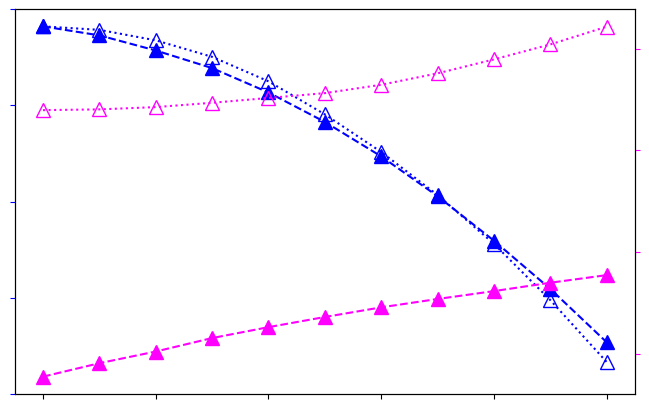

In [678]:
fig, (ax1) = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
        "font.weight": "normal",
        "font.style": "normal",
    "mathtext.default": "regular"
    })

clr1 = "blue"
clr2 = "magenta"
ax1.plot(angles_ab, cell_volume_ab/2, 'b^--', markersize=10, label="Volume, $ab$ shear")
ax1.plot(angles_ab, cell_volume_ac/2, 'b^:', markersize=10, markerfacecolor='none', label="Volume, $ac$ shear")
ax2.plot(angles_ab, latcon_c, '^--', color = clr2, markersize=10, label="$c$ constant, $ab$ shear")
ax2.plot(angles_ab, latcon_b, '^:', color = clr2, markersize=10, markerfacecolor='none', label="$b$ constant, $ac$ shear")

#ax1.set_xlabel('$\\theta$ ($^o$)')
#ax1.set_ylabel('Unit cell volume (Å$^3$)', color = clr1)
ax1.set_yticks([142, 142.5, 143, 143.5, 144])
ax1.invert_xaxis()
#ax2.set_ylabel('Free lattice constant (Å)', color = clr2)
ax1.tick_params(axis='y', colors = clr1)
ax2.tick_params(axis='y', colors = clr2)
ax2.set_yticks(np.arange(5.21, 5.28, 0.02))

ax1.xaxis.set_tick_params(labelbottom=False)
ax1.yaxis.set_tick_params(labelleft=False)
ax2.yaxis.set_tick_params(labelright=False)

labels = []
hndls = []
for ax in fig.axes:
    hndl, lbl = ax.get_legend_handles_labels()
    for i in zip(hndl, lbl):
        hndls.append(i[0])
        labels.append(i[1])
#fig.legend(hndls, labels, bbox_to_anchor=(0.52, 0.63), ncol= 1)
plt.savefig(f'{homedir}/nn9301k/volume_lat_param_shear_nolegend.pdf', format="pdf", bbox_inches="tight")
plt.show()

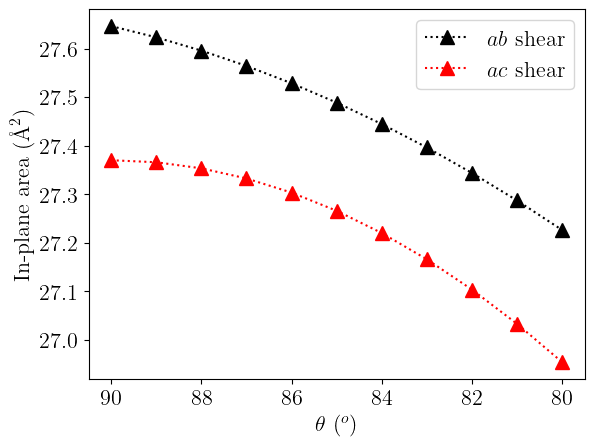

In [613]:
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
#ax1.plot(angles_ab, cell_volume_ab, 'k^--', markersize=10, label="$ab$ shear")
#ax1.plot(angles_ab, cell_volume_ac, 'r^--', markersize=10, label="$ac$ shear")
ax1.plot(angles_ab, areas_ab, 'k^:', markersize=10, label="$ab$ shear")
ax1.plot(angles_ab, areas_ac, 'r^:', markersize=10, label="$ac$ shear")
#ax2.plot(finishedA, latconstA, 'rs--')

ax1.set_xlabel('$\\theta$ ($^o$)')
#ax1.set_ylabel('Unit cell volume (Å$^3$)')#, color='black')
ax1.set_ylabel("In-plane area (Å$^2$)")#, color='r')
ax1.set_yticks([27.7, 27.5, 27.3, 27.1, 292, 295])
#ax2.set_yticks([3.72, 3.73, 3.74, 3.75, 3.76, 3.77])
#ax1.yaxis.label.set_color('blue')
#ax2.yaxis.label.set_color('red')
#ax1.tick_params(axis='y')#, colors='black')
#ax2.tick_params(axis='y')#, colors='red')
ax1.invert_xaxis()
#ax2.set_ylabel('Lattice constant c (Å)', color='r')
#os.chdir(f'/home/ubuntu/nn9301k')
ax1.legend()
#plt.savefig(f'params.pdf', format="pdf", bbox_inches="tight")
plt.show()

1 read
[[-0.00072365 -0.00087673 -0.00799177]]
0.008072349859715798
2 read
[[-0.00072364 -0.00087672  0.00305751]]
0.0032626757294665783
3 read
[[-0.00072363 -0.00087671 -0.0251402 ]]
0.02516601607732347
4 read
[[-0.00072363 -0.00087671  0.00652615]]
0.006625082875610104
5 read
[[-0.00072363 -0.0008767   0.00696926]]
0.007062149230730989
6 read
[[-0.00072363 -0.0008767   0.00906401]]
0.009135746682442424
7 read
[[-0.00072363 -0.0008767   0.01108707]]
0.011145890494784526
8 read
[[-0.00072363 -0.00087671  0.01194586]]
0.012000567805175994
9 read
[[-0.00072364 -0.00087671  0.01402763]]
0.014074324807415294
10 read
[[-0.00072364 -0.00087672 -0.08230593]]
0.08231391928498066

[0.00000e+00 1.81000e-01 3.44000e-01 5.45000e-01 6.87000e-01 8.59000e-01
 1.03000e+00 1.20100e+00 1.37500e+00 4.06708e+02 4.06925e+02]


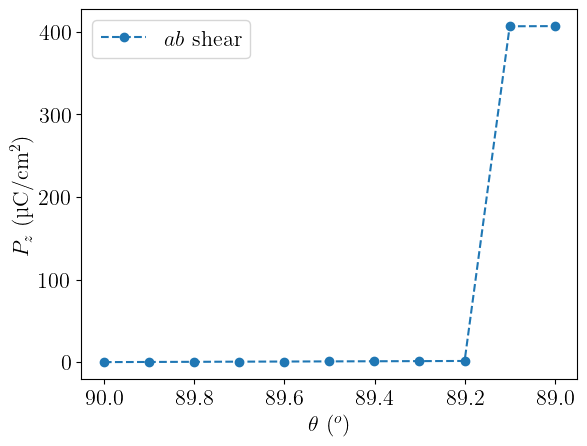

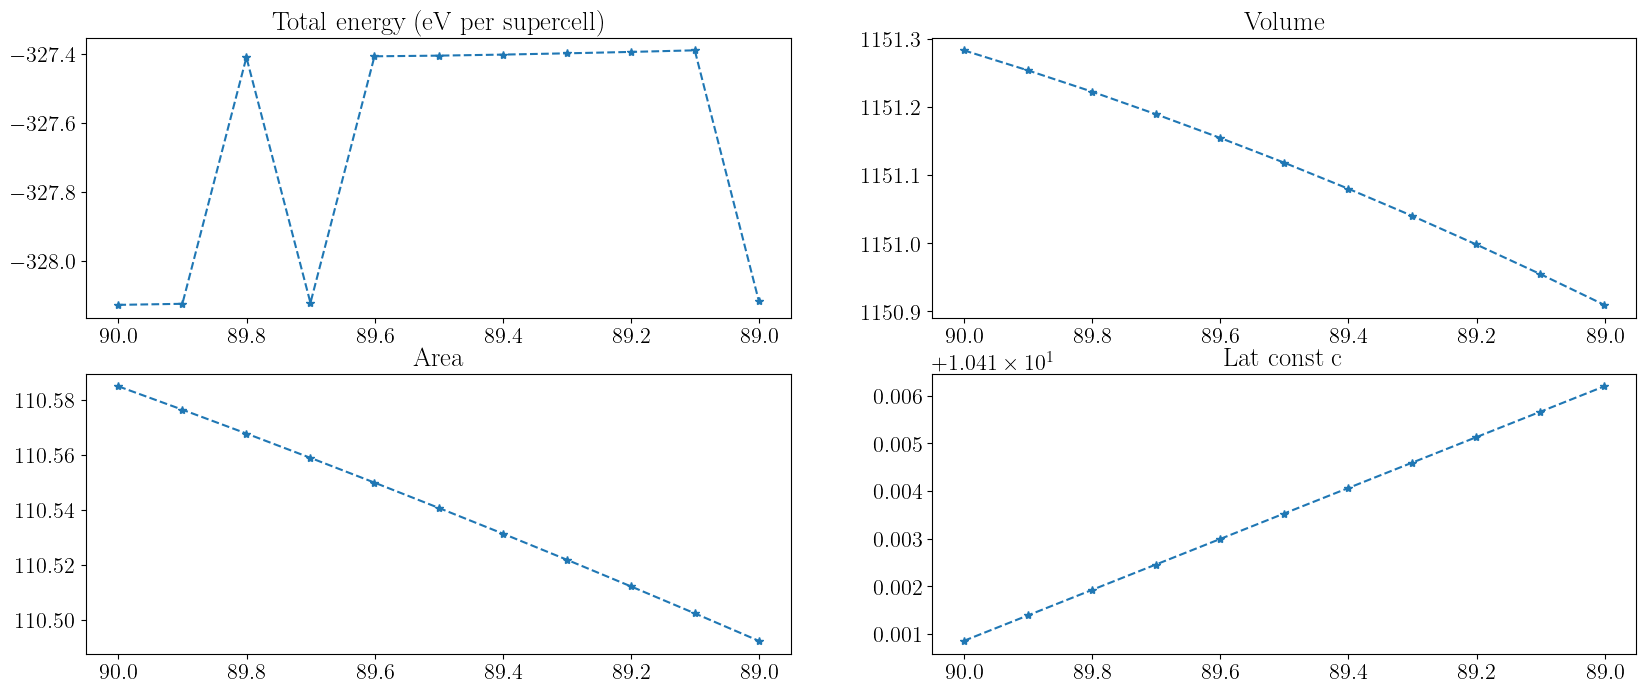

In [314]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/2/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/2/{i}/CONTCAR"))
    polarization_ab89 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    pol_vect_ab89 = polarization_ab89.get_polarization_change()
    print(pol_vect_ab89)
    print(polarization_ab89.get_polarization_change_norm())
ab_angles.append(89)
ab_pols.append(polarization_ab89.get_polarization_change_norm())
angles89ab, energies89ab, lat_c89, areas_ab89, volumes_ab89 = pol_plot_ab(structsAB, outcarsAB)

### 88 deg ab shear

1 read
[[-0.00072364 -0.00087672 -0.01731451]]
0.017351912167817226
2 read
[[-0.00072364 -0.00087672 -0.03335451]]
0.03337401393314046
3 read
[[-0.00072364 -0.00087672 -0.05125897]]
0.05127170396558269
4 read
[[-0.00072365 -0.00087673 -0.06760957]]
0.0676192533307102
5 read
[[-0.00072367 -0.00087675 -0.0838998 ]]
0.08390763149283169
6 read
[[-0.00072369 -0.00087678 -0.10008872]]
0.10009530449443454
7 read
[[-0.00072372 -0.00087681 -0.11712735]]
0.11713299539193901
8 read
[[-0.00072375 -0.00087685 -0.13321159]]
0.1332165730035647
9 read
[[-0.0007238  -0.00087691 -0.14991034]]
0.14991478225102234
10 read
[[-0.00072384 -0.00087696 -0.16543082]]
0.16543486404433203

[0.00000e+00 3.62000e-01 7.23000e-01 1.08600e+00 1.44800e+00 4.06913e+02
 8.99288e+02 8.99478e+02 8.99672e+02 8.99872e+02 9.00077e+02]


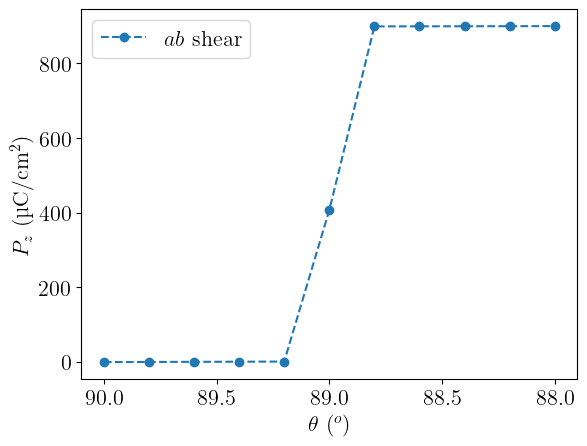

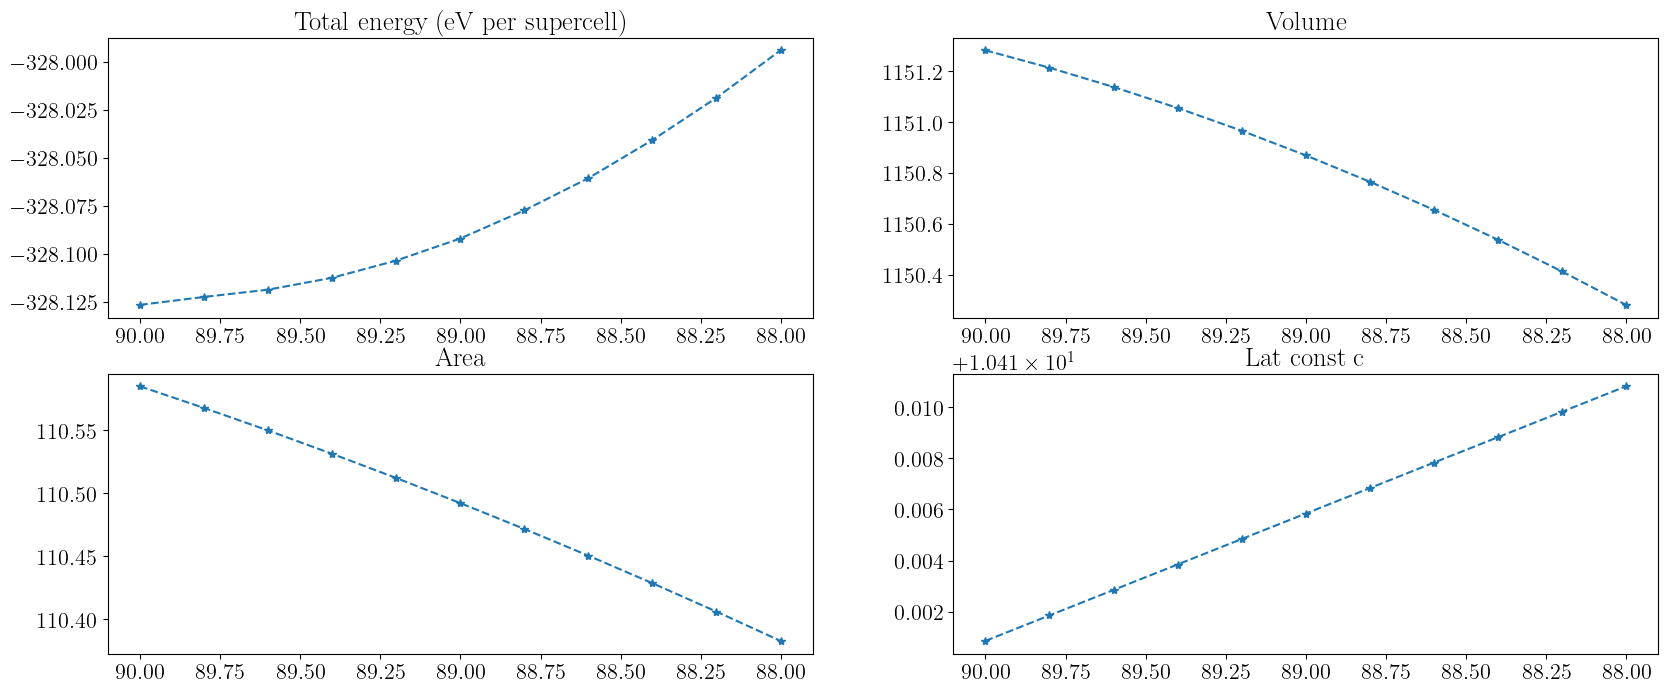

In [317]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/4/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/4/{i}/CONTCAR"))
    polarization_ab88 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab88.get_polarization_change())
    print(polarization_ab88.get_polarization_change_norm())
ab_angles.append(88)
ab_pols.append(polarization_ab88.get_polarization_change_norm())
pols_ab89, angles88ab, energies88ab, lat_c88, areas_ab88, volumes_ab88 = pol_plot_ab(structsAB, outcarsAB)

In [325]:
pols88ab_ion = pols_ab

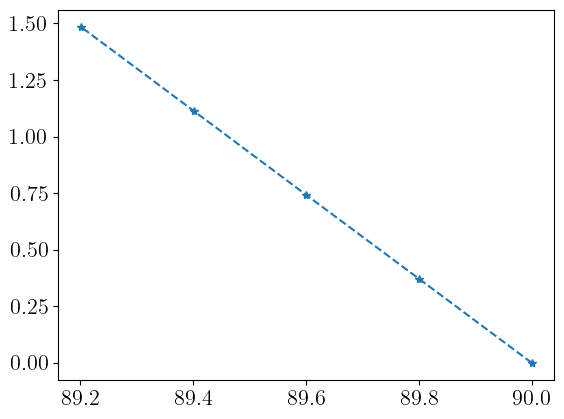

In [330]:
l = 5 #len(angles88ab)
plt.plot(angles88ab[0:l], pols88ab_ion[0:l], '*--')

### 87 deg ab shear

1 read
[[-0.00072364 -0.00087672 -0.02601935]]
0.026044295060534215
2 read
[[-0.00072364 -0.00087672 -0.05236205]]
0.05237451810290897
3 read
[[-0.00072365 -0.00087673 -0.07718055]]
0.0771890525698125
4 read
[[-0.00072368 -0.00087677 -0.1024779 ]]
0.10248433189474665
5 read
[[-0.00072372 -0.00087682 -0.12822819]]
0.12823335604250552
6 read
[[-0.00072378 -0.00087689 -0.15332272]]
0.15332706513861233
7 read
[[-0.00072386 -0.00087698 -0.17760851]]
0.17761228032970935
8 read
[[-0.00072395 -0.00087709 -0.203221  ]]
0.20322431269310023
9 read
[[-0.00072405 -0.00087721  0.04422621]]
0.04424150652614073
10 read
[[-0.00072417 -0.00087736 -0.25336827]]
0.253370958849658

[0.00000e+00 5.43000e-01 1.08600e+00 4.06786e+02 8.99291e+02 8.99577e+02
 8.99876e+02 9.00186e+02 9.00510e+02 9.00573e+02 9.01194e+02]


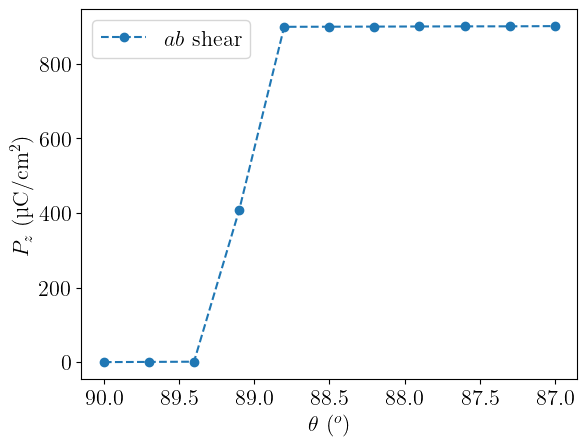

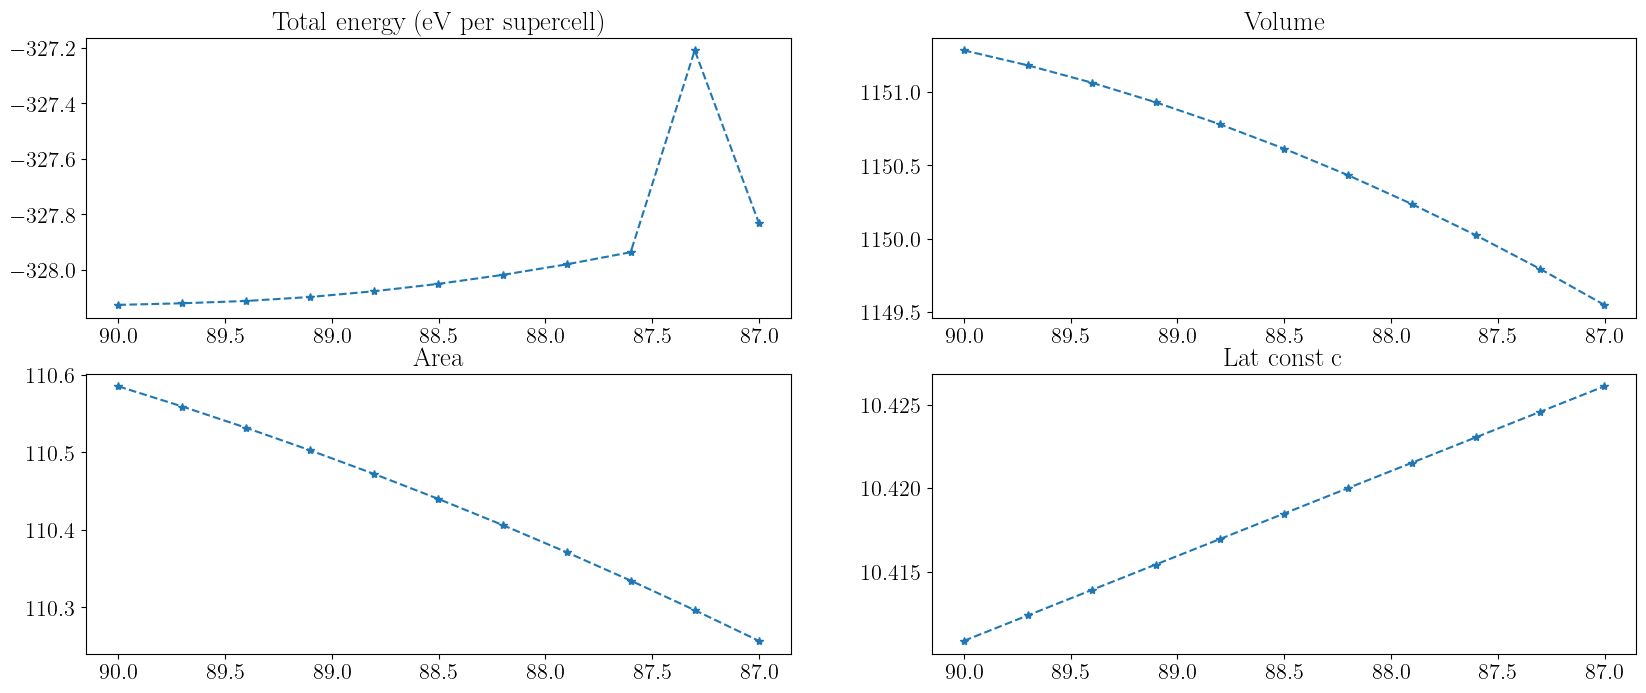

In [282]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/6/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/6/{i}/CONTCAR"))
    polarization_ab87 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab87.get_polarization_change())
    print(polarization_ab87.get_polarization_change_norm())
ab_angles.append(87)
ab_pols.append(polarization_ab87.get_polarization_change_norm())
angles87ab, energies87ab, lat_c87, areas_ab87, volumes_ab87 = pol_plot_ab(structsAB, outcarsAB)

### 86 deg ab shear

1 read
[[-0.00072364 -0.00087672 -0.03744808]]
0.03746544648223325
2 read
[[-0.00072366 -0.00087674 -0.07523887]]
0.0752475776137965
3 read
[[-0.0007237  -0.00087679 -0.1118567 ]]
0.11186259168317092
4 read
[[-0.00072376 -0.00087687 -0.1488159 ]]
0.1488203585341402
5 read
[[-0.00072386 -0.00087698 -0.18510645]]
0.18511005863154584
6 read
[[-0.00072398 -0.00087713 -0.22197905]]
0.22198208769195454
7 read
[[-0.00072412 -0.0008773  -0.25815076]]
0.25815338176617425
8 read
[[-0.0007243  -0.00087751 -0.29523615]]
0.29523846717926433
9 read
[[-0.0007245  -0.00087776 -0.33174154]]
0.3317436120839134
10 read
[[-0.00072472 -0.00087803 -0.36868113]]
0.3686830074990759

[0.00000e+00 7.27000e-01 1.45500e+00 8.99300e+02 8.99688e+02 9.00097e+02
 9.00528e+02 9.00982e+02 9.01458e+02 8.72872e+02 8.73378e+02]


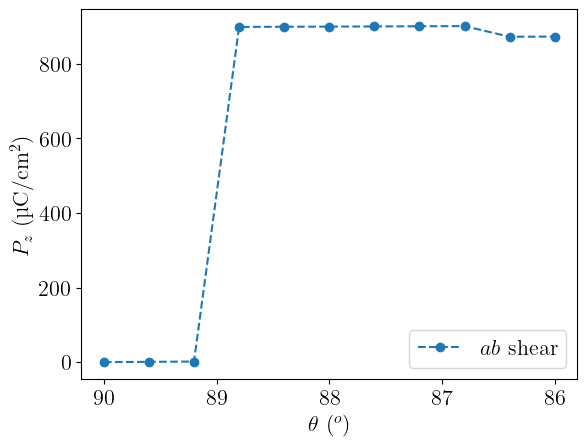

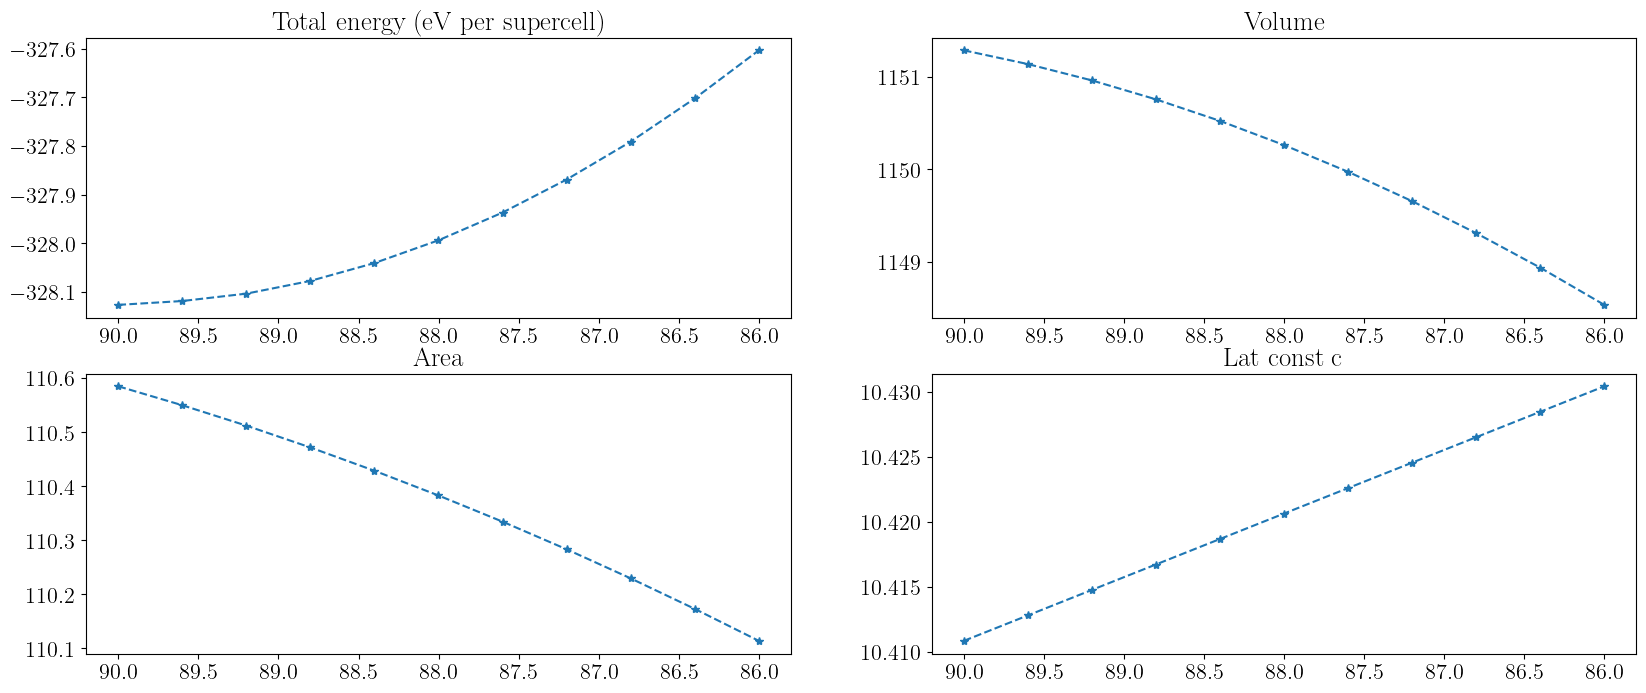

In [283]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/8/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/8/{i}/CONTCAR"))
    polarization_ab86 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab86.get_polarization_change())
    print(polarization_ab86.get_polarization_change_norm())
ab_angles.append(86)
ab_pols.append(polarization_ab86.get_polarization_change_norm())
angles86ab, energies86ab, lat_c86, areas_ab86, volumes_ab86 = pol_plot_ab(structsAB, outcarsAB)

### 85 deg ab shear

1 read
[[-0.00072365 -0.00087673 -0.05072598]]
0.050738821415101304
2 read
[[-0.00072369 -0.00087677 -0.10005491]]
0.10006147758231611
3 read
[[-0.00072376 -0.00087687 -0.14962108]]
0.14962551514398378
4 read
[[-0.00072388 -0.00087701 -0.19862357]]
0.19862693606695597
5 read
[[-0.00072404 -0.0008772  -0.24774782]]
0.2477505445985906
6 read
[[-0.00072424 -0.00087745 -0.29639664]]
0.29639893687031926
7 read
[[-0.00072449 -0.00087774 -0.34578294]]
0.34578492162894786
8 read
[[-0.00072477 -0.00087809 -0.3956935 ]]
0.3956952525309
9 read
[[-0.0007251  -0.00087849 -0.44616175]]
0.4461633169958088
10 read
[[-0.00072547 -0.00087893 -0.49682054]]
0.4968219540110043

[  0.      0.909 406.937 899.599 900.11  900.656 901.237 872.772 873.405
 874.072 874.773]


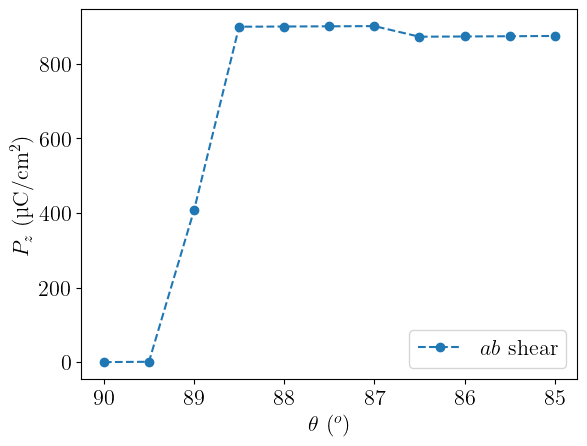

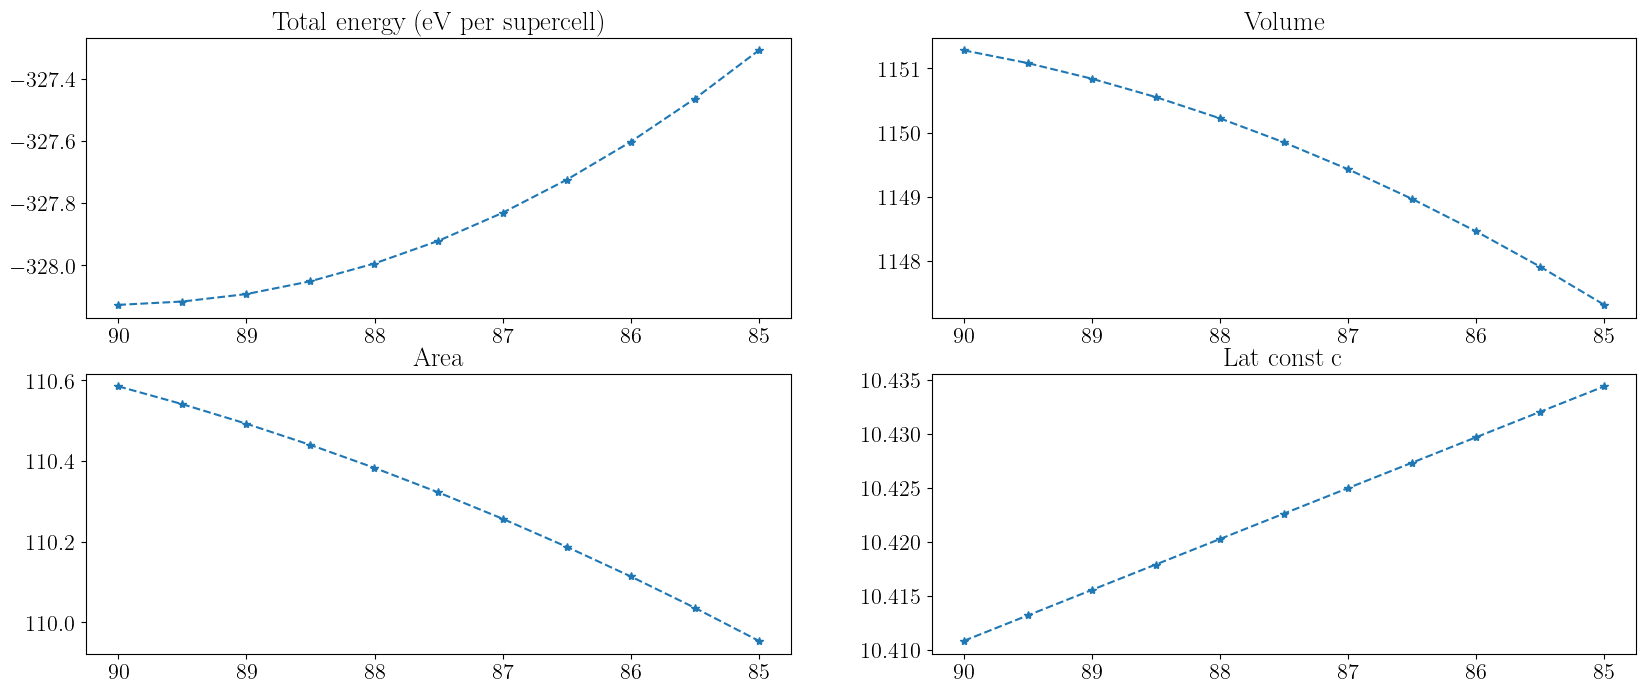

In [284]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/10/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/10/{i}/CONTCAR"))
    polarization_ab85 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab85.get_polarization_change())
    print(polarization_ab85.get_polarization_change_norm())
ab_angles.append(85)
ab_pols.append(polarization_ab85.get_polarization_change_norm())
angles85ab, energies85ab, lat_c85, areas_ab85, volumes_ab85 = pol_plot_ab(structsAB, outcarsAB)

### 84 deg ab shear

1 read
[[-0.00072366 -0.00087674 -0.06556163]]
0.06557158668942344
2 does not contain OUTCAR yet
3 read
[[-0.00072385 -0.00087697 -0.1950207 ]]
0.19502412185983078
4 read
[[-0.00072403 -0.00087719 -0.25908161]]
0.25908420665060156
5 read
[[-0.00072428 -0.00087749 -0.32294992]]
0.3229520272438591
6 read
[[-0.00072458 -0.00087786 -0.38796669]]
0.38796846572147253
7 read
[[-0.00072495 -0.0008783  -0.4528554 ]]
0.45285693589869863
8 read
[[-0.00072537 -0.00087881 -0.51954113]]
0.519542482844356
9 read
[[-0.00072586 -0.0008794  -0.58649035]]
0.5864915575453606
10 read
[[-0.0007264  -0.00088006 -0.65500189]]
0.655002990977672

[  0.      1.091 899.917 900.566 901.264 872.928 873.704 874.532 875.408
 876.336]


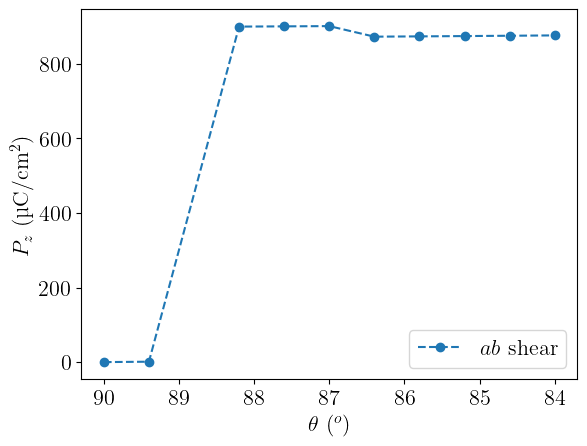

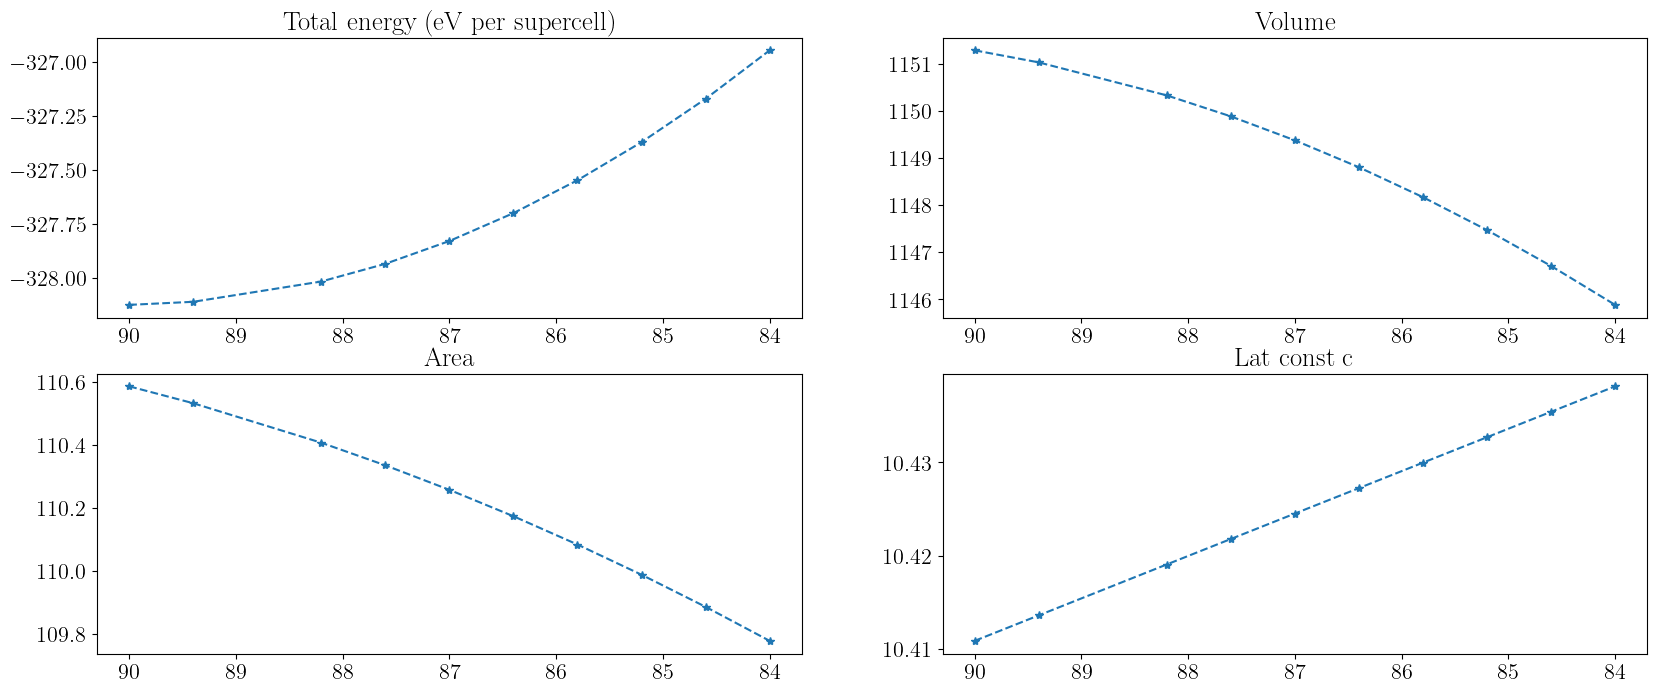

In [285]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/12/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/12/{i}/CONTCAR"))
    polarization_ab84 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab84.get_polarization_change())
    print(polarization_ab84.get_polarization_change_norm())
ab_angles.append(84)
ab_pols.append(polarization_ab84.get_polarization_change_norm())
angles84ab, energies84ab, lat_c84, areas_ab84, volumes_ab84 = pol_plot_ab(structsAB, outcarsAB)

### 83 deg ab shear

1 read
[[-0.00072368 -0.00087676 -0.08262812]]
0.08263603524682525
2 read
[[-0.00072378 -0.00087688 -0.16398866]]
0.16399270082392503
3 read
[[-0.00072396 -0.00087711 -0.24522796]]
0.24523069001358772
4 read
[[-0.00072422 -0.00087743 -0.32625108]]
0.3262531557296308
5 read
[[-0.00072457 -0.00087784 -0.4071176 ]]
0.40711928591692076
6 read
[[-0.000725   -0.00087836 -0.48869838]]
0.4886997993997498
7 read
[[-0.00072551 -0.00087898 -0.57225436]]
0.572255594972655
8 read
[[-0.0007261  -0.0008797  -0.65750305]]
0.657504133798098
9 read
[[-7.26777073e-04 -8.80518376e-04 -7.44351169e-01]]
0.7443521384729184
10 read
[[-7.27536267e-04 -8.81438166e-04 -8.32621344e-01]]
0.8326222219889188

[  0.      1.27  899.525 900.253 901.05  872.834 873.74  874.716 875.76
 876.874 878.057]


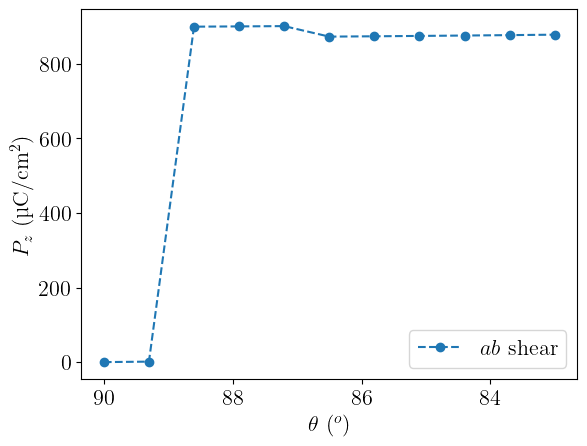

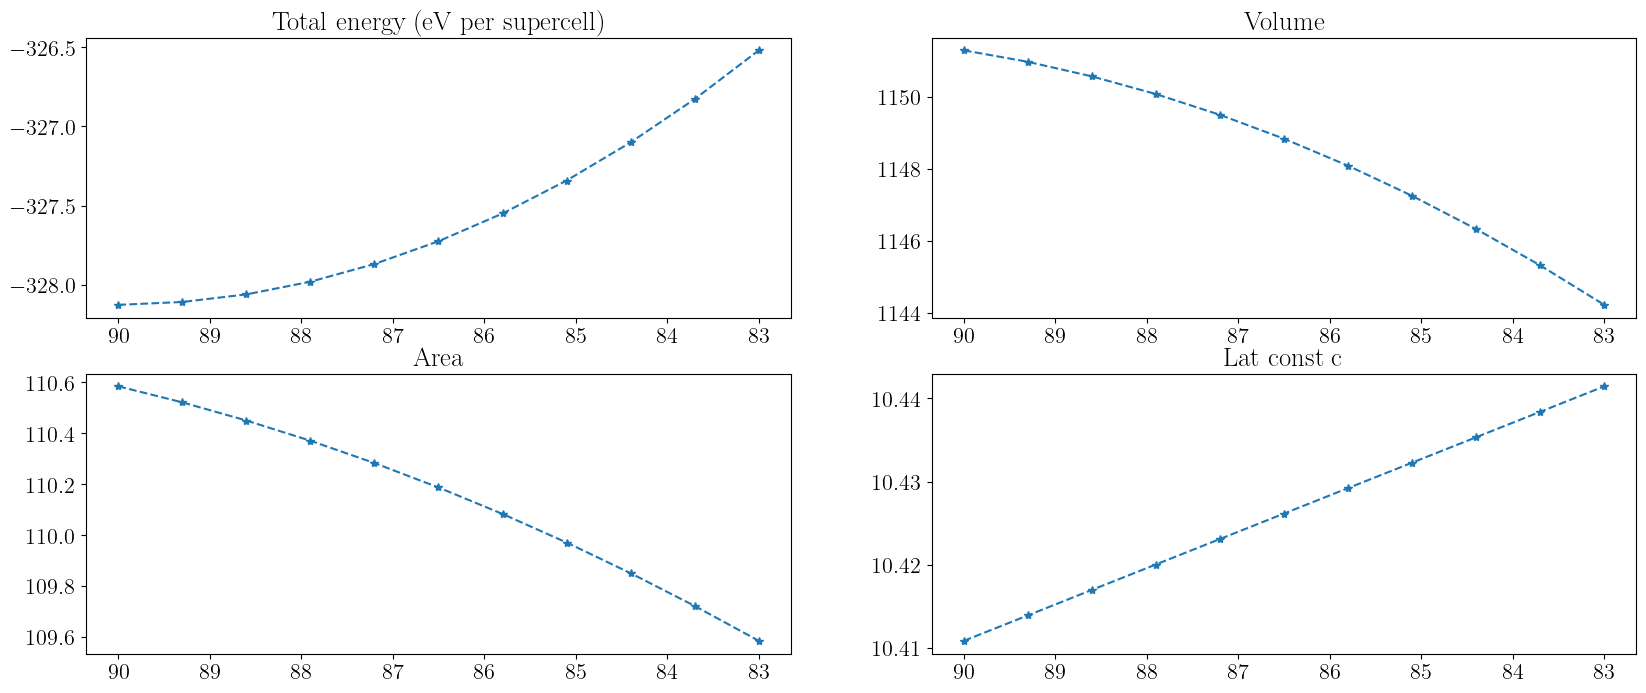

In [286]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/14/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/14/{i}/CONTCAR"))
    polarization_ab83 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab83.get_polarization_change())
    print(polarization_ab83.get_polarization_change_norm())
ab_angles.append(83)
ab_pols.append(polarization_ab83.get_polarization_change_norm())
angles83ab, energies83ab, lat_c83, areas_ab83, volumes_ab83 = pol_plot_ab(structsAB, outcarsAB)

### 82 deg ab shear

1 read
[[-0.00072369 -0.00087678 -0.10203887]]
0.10204528574015816
2 read
[[-0.00072384 -0.00087696 -0.20206151]]
0.20206480026420945
3 read
[[-0.00072409 -0.00087726 -0.30163302]]
0.3016352486480553
4 read
[[-0.00072445 -0.00087769 -0.40107987]]
0.4010815689277081
5 read
[[-0.00072491 -0.00087826 -0.5015601 ]]
0.5015614850812332
6 read
[[-0.00072548 -0.00087895 -0.60348756]]
0.6034887225181412
7 read
[[-0.00072616 -0.00087977 -0.70815039]]
0.7081513941913459
8 read
[[-7.26949489e-04 -8.80727265e-04 -8.15109314e-01]]
0.8151102016954993
9 read
[[-7.27846404e-04 -8.81813912e-04 -9.23331348e-01]]
0.9233321435657085
10 read
[[-7.2885299e-04 -8.8303343e-04 -1.0352960e+00]]
1.0352967227703624

[  0.      1.449 899.741 900.608 901.564 873.511 874.615 875.811 877.097
 878.473 879.944]


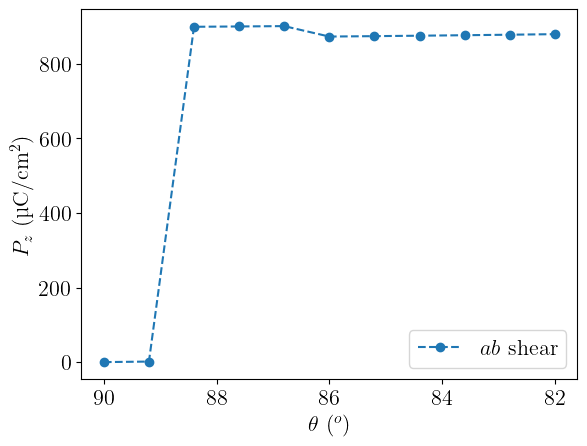

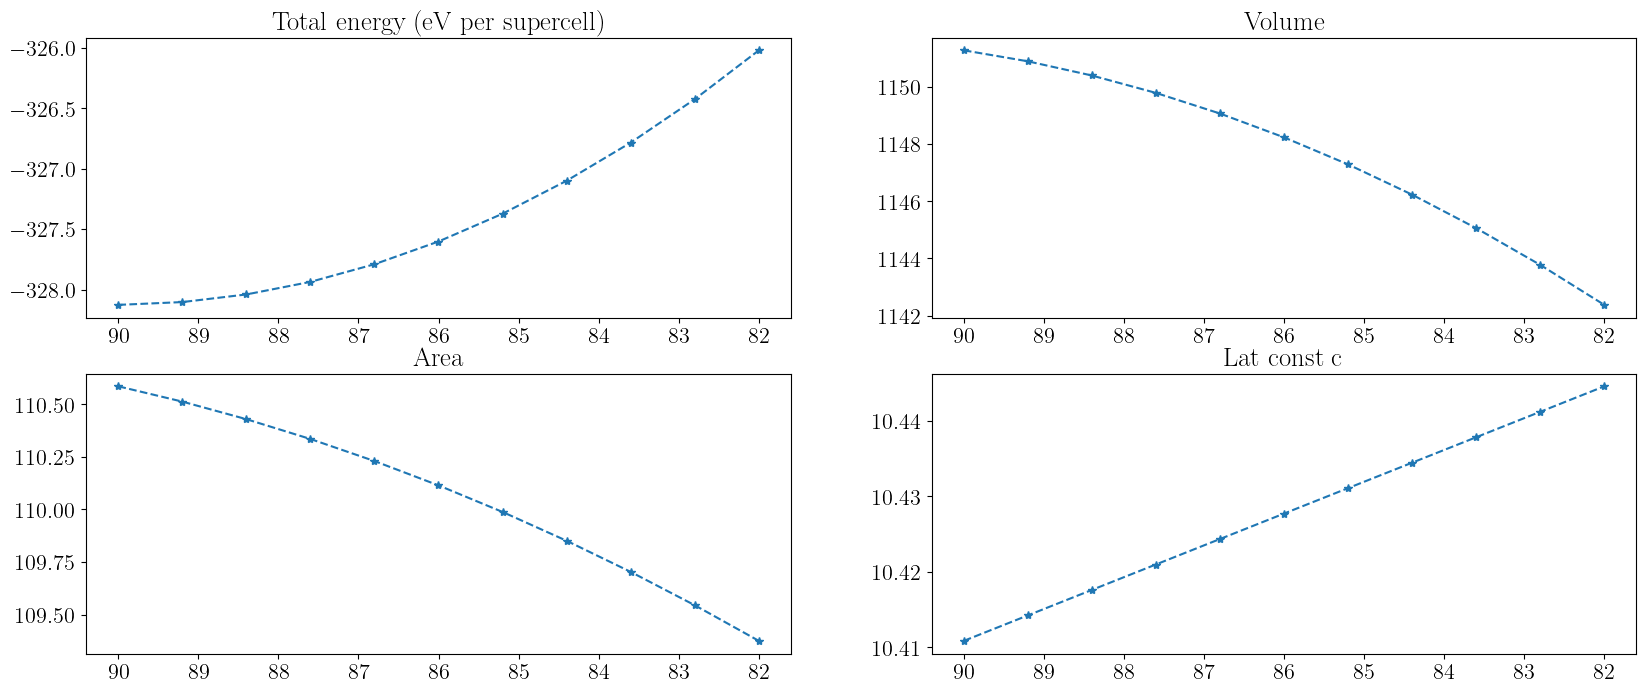

In [287]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/16/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/16/{i}/CONTCAR"))
    polarization_ab82 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab82.get_polarization_change())
    print(polarization_ab82.get_polarization_change_norm())
ab_angles.append(82)
ab_pols.append(polarization_ab82.get_polarization_change_norm())
angles82ab, energies82ab, lat_c82, areas_ab82, volumes_ab82 = pol_plot_ab(structsAB, outcarsAB)

### 81 deg ab shear

1 read
[[-0.00072371 -0.00087681 -0.1228256 ]]
0.12283094190795538
2 read
[[-0.0007239  -0.00087704 -0.24545584]]
0.24545855804278707
3 read
[[-0.00072423 -0.00087743 -0.36618077]]
0.36618262104375493
4 read
[[-0.00072469 -0.00087799 -0.48892906]]
0.4889304662346027
5 read
[[-0.00072529 -0.00087871 -0.61119261]]
0.6111937497145059
6 read
[[-7.26018453e-04 -8.79599279e-04 -7.36936230e-01]]
0.736937193765844
7 read
[[-7.26888077e-04 -8.80652860e-04 -8.65486042e-01]]
0.865486876324309
8 read
[[-7.27895500e-04 -8.81873392e-04 -9.96902632e-01]]
0.9969033681663086
9 read
[[-7.29041963e-04 -8.83262378e-04 -1.13106930e+00]]
1.1310699594390805
10 read
[[-7.30328289e-04 -8.84820811e-04 -1.26751520e+00]]
1.2675158033507097

[  0.    406.818 899.968 900.983 873.029 874.237 875.559 876.995 878.547
 880.216 882.001]


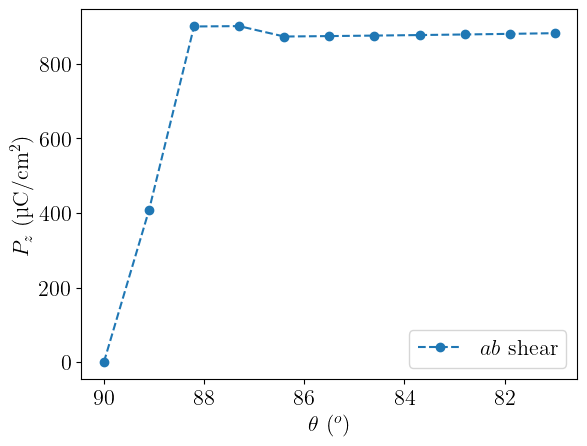

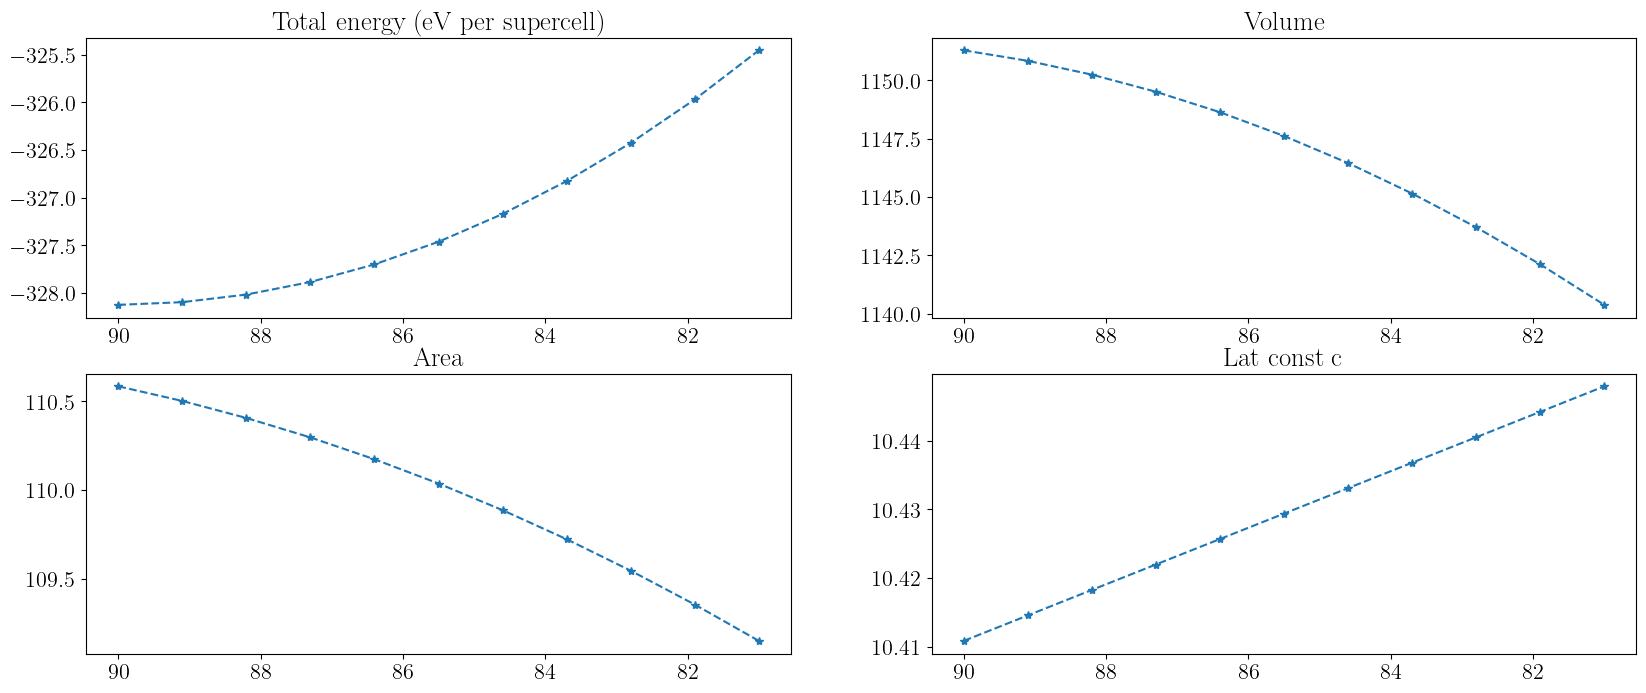

In [288]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/18/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/18/{i}/CONTCAR"))
    polarization_ab81 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab81.get_polarization_change())
    print(polarization_ab81.get_polarization_change_norm())
ab_angles.append(81)
ab_pols.append(polarization_ab81.get_polarization_change_norm())
angles81ab, energies81ab, lat_c81, areas_ab81, volumes_ab81 = pol_plot_ab(structsAB, outcarsAB)

### 80 deg ab shear

1 read
[[-0.00072373 -0.00087683 -0.1486079 ]]
0.1486123191027046
2 read
[[-4.93071461e-05 -4.15166547e-04 -3.84657476e-01]]
0.38465770524676446
3 read
[[-0.00072439 -0.00087763 -0.44190246]]
0.4419039972681492
4 read
[[-0.00072497 -0.00087833 -0.58967309]]
0.5896742626359568
5 read
[[-7.25714594e-04 -8.79231141e-04 -7.37925182e-01]]
0.7379261376246574
6 read
[[-7.26629245e-04 -8.80339276e-04 -8.91170240e-01]]
0.8911710464272566
7 read
[[-7.27713708e-04 -8.81653145e-04 -1.04652542e+00]]
1.0465261155903425
8 read
[[-7.28969547e-04 -8.83174642e-04 -1.20548244e+00]]
1.2054830565345382
9 read
[[-7.30398054e-04 -8.84905335e-04 -1.36666029e+00]]
1.3666608441440877
10 read
[[-7.32000907e-04 -8.86847250e-04 -1.52827122e+00]]
1.528271722902306

[  0.    406.967 900.296 901.382 873.599 875.014 876.572 878.271 880.114
 882.1   884.231]


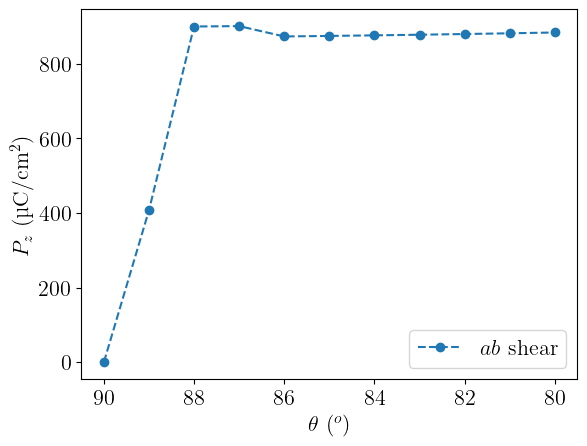

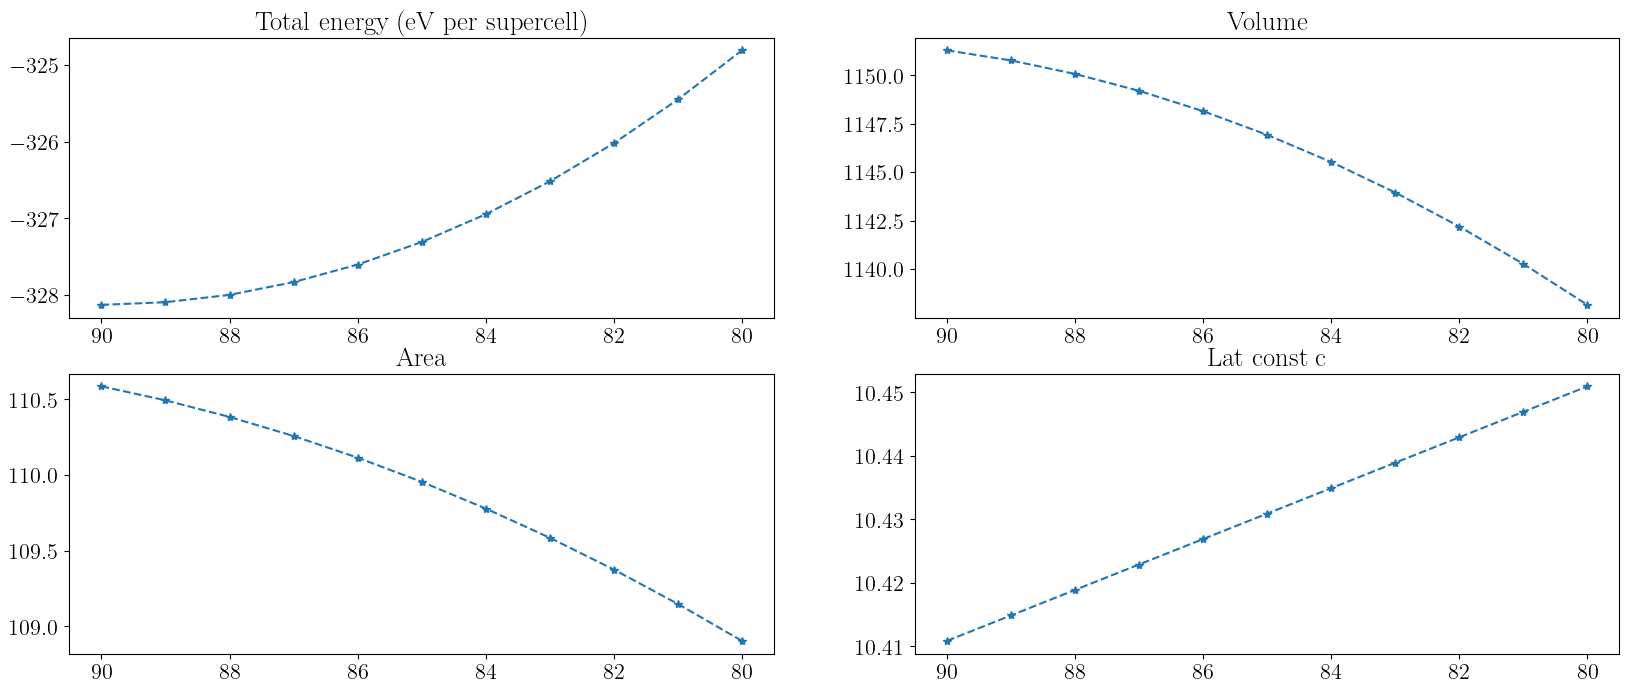

In [289]:
# Read structures and dipole moments.
outcarsAB = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAB = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAB.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/20/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAB.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ab/80/20/{i}/CONTCAR"))
    polarization_ab80 = Polarization.from_outcars_and_structures(outcarsAB, structsAB, calc_ionic_from_zval=True)
    print(polarization_ab80.get_polarization_change())
    print(polarization_ab80.get_polarization_change_norm())
ab_angles.append(80)
ab_pols.append(polarization_ab80.get_polarization_change_norm())
angles80ab, energies80ab, lat_c80, areas_ab80, volumes_ab80 = pol_plot_ab(structsAB, outcarsAB)

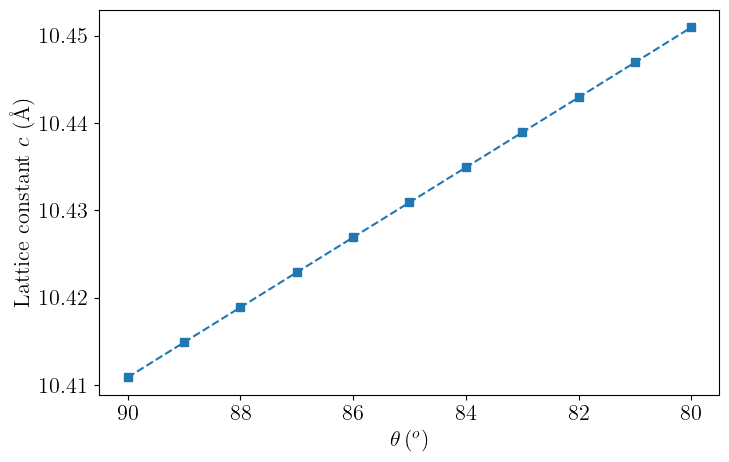

In [440]:
fig, ax1 = plt.subplots(1,1, figsize=(8,5))
ax1.plot(angles80ab, lat_c80, 's--', markersize=6)
ax1.set_ylabel('Lattice constant $c$ (Å)')
ax1.set_xlabel('$\\theta \,(^o)$')
ax1.invert_xaxis()

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(8,5))
ax2 = ax1.twinx()
ax1.plot(angles80ab, np.array(volumes_ab80)/4, 'b^--', markersize=6)
ax2.plot(angles80ab, np.array(areas_ab80)/4, 'rs--', markersize=6)
ax1.set_ylabel('Unit cell volume (Å$^3$)', color='b')
ax1.set_xlabel('$\\theta \,(^o)$')
ax2.set_ylabel("$ab$ plane area (Å$^2$)", color='r')
ax2.set_yticks([27.2, 27.3, 27.4, 27.5, 27.6])
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax1.invert_xaxis()

In [680]:
areas_ab80

[110.58488672957844,
 110.49233530738502,
 110.383034193599,
 110.25694409305103,
 110.114106112941,
 109.95447952868497,
 109.77808479822899,
 109.584941614287,
 109.37501040012297,
 109.14833034985699,
 108.90486265198497]

In [416]:
a_1 = 0
strains_ab = [1.0]
for a in areas_ab80:
    if a == areas_ab80[0]:
        a_1 = a
    else:
        strains_ab.append(a/a_1)
print(len(strains_ab))
strains_ab = np.array(strains_ab) - 1
strains_ab

11


array([ 0.        , -0.00083693, -0.00182532, -0.00296553, -0.00425719,
       -0.00570066, -0.00729577, -0.00904233, -0.0109407 , -0.01299053,
       -0.01519217])

In [417]:
print(len(lat_c80))
c0 = lat_c80[0]
c = lat_c80
lat_c80

11


[10.410854009097507,
 10.414861,
 10.418869,
 10.422876,
 10.426884,
 10.430891,
 10.434898,
 10.438906,
 10.442913,
 10.44692,
 10.450928]

In [418]:
poissons = []
for i in range(len(strains_ab)):
    I = ((c[i]-c0) / c0)/(strains_ab[i])
    v = I/(I - 2)
    print(v)
    poissons.append(v)

nan
0.18695226434617204
0.17415859161854155
0.16296726570742937
0.15314510800025016
0.1444268410938545
0.1366489971902106
0.1296729609838551
0.1233687692694872
0.11765085512130068
0.11244078111096335


In [393]:
v_1 = 0
for v in volumes_ab80:
    if v == volumes_ab80[0]:
        v_1 = v
    else:
        print(v/v_1 - 1)

-0.0004523627223242954
-0.001056854093139048
-0.0018141974921923598
-0.002724004304388572
-0.0037870098030468036
-0.005003108090919417
-0.0063722005081495725
-0.007895011471986235
-0.009571265266573703
-0.01140139449540023


In [333]:
ab_angles = [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80]

In [334]:
ab_pols = [0, 0.0823, 0.1654, 0.2534,  0.3687, 0.4968, 0.6550, 0.8326, 1.0353, 1.2675, 1.5283]

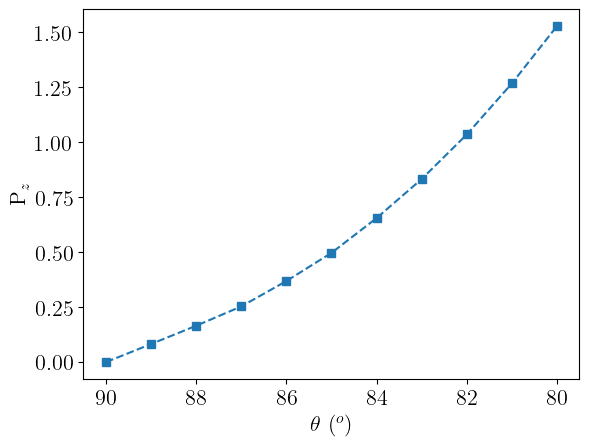

In [335]:
fig, ax = plt.subplots()
ax.plot(ab_angles, ab_pols, "s--")
ax.set_xlabel("$\\theta$ ($^o$)")
ax.set_ylabel("P$_z$")
ax.invert_xaxis()

In [367]:
from sklearn.metrics import r2_score
import scipy.stats as stats
  
# degree 2 and 3 polynomial fit
polyline = np.linspace(0, 10, 11)
model = np.poly1d(np.polyfit(polyline, ab_pols, 2))
model3 = np.poly1d(np.polyfit(polyline, ab_pols, 3))

plt.scatter(polyline, ab_pols, label='$|P_z|$, $ab$ plane')
plt.plot(polyline, model(polyline), '--', label=f'quad. fit, R2: {r2_score(ab_pols, model(polyline))}')
plt.plot(polyline, model3(polyline), label=f'cub. fit, R2: {r2_score(ab_pols, model3(polyline))}')
plt.xlabel('$\mathrm{\\theta}$ ($^o$)')
plt.ylabel('µC/cm$^2$')
plt.legend()
print(model)
print(model3)

         2
0.01064 x + 0.04307 x + 0.02017
          3            2
0.000441 x + 0.004021 x + 0.06829 x + 0.00429


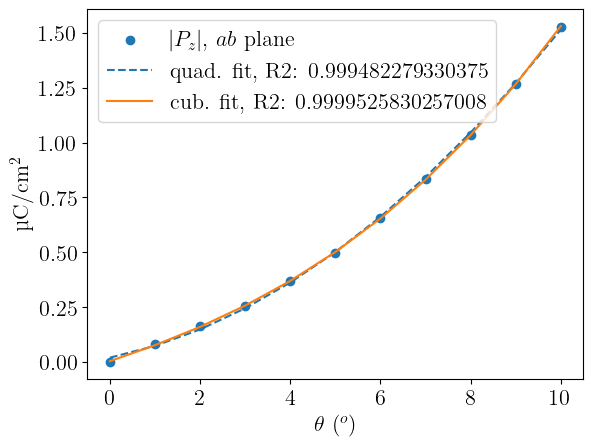

### Polarization of 89 deg in ac plane, using intermediate structure. Tetragonal as non-polar.

In [240]:
nonpolar = Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")
polar = Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/86/CONTCAR")

structs = nonpolar.interpolate(polar, interpolate_lattices=True)
for i in range(1, 11):
    structs[i].to(filename=f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/86/{i}/POSCAR")

In [295]:
ac_pols = []
ac_angles = []

1 read
[[ 1.40777085e-05 -2.70581227e-02 -1.53725724e-04]]
0.027058562854380408
2 read
[[-2.74856266e-05 -5.32999767e-02 -1.68215020e-04]]
0.05330024955049779
3 read
[[-8.29780341e-05 -7.95539199e-02 -1.68679108e-04]]
0.07955414287375431
4 read
[[-0.00012455 -0.1060363  -0.0001691 ]]
0.10603651001682095
5 read
[[-0.00016613 -0.132441   -0.00016944]]
0.13244121484004456
6 read
[[-0.00022163 -0.15868389 -0.00016964]]
0.15868413377521978
7 read
[[-2.63209604e-04 -1.84597435e-01 -1.69826153e-04]]
0.18459770374877787
8 read
[[-3.18712085e-04 -2.11980467e-01 -1.69844448e-04]]
0.21198077808024676
9 read
[[-3.60299390e-04 -2.37543579e-01 -1.69875555e-04]]
0.23754391710882908
10 read
[[-4.01890258e-04 -2.63851929e-01 -1.69834483e-04]]
0.26385229383546993

[-1.000e-03  1.950e-01  3.900e-01  5.860e-01  7.810e-01  9.770e-01
  1.171e+00  1.367e+00  1.562e+00  1.758e+00  1.953e+00]


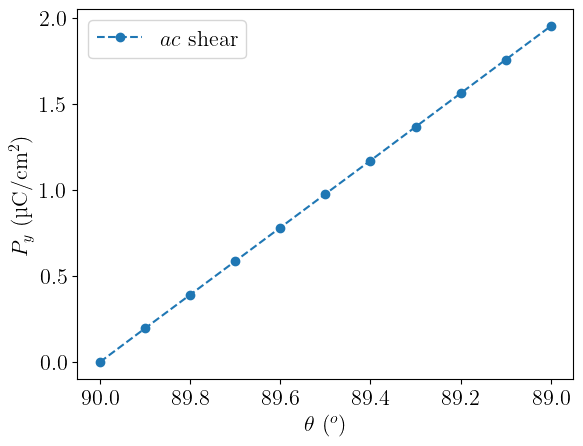

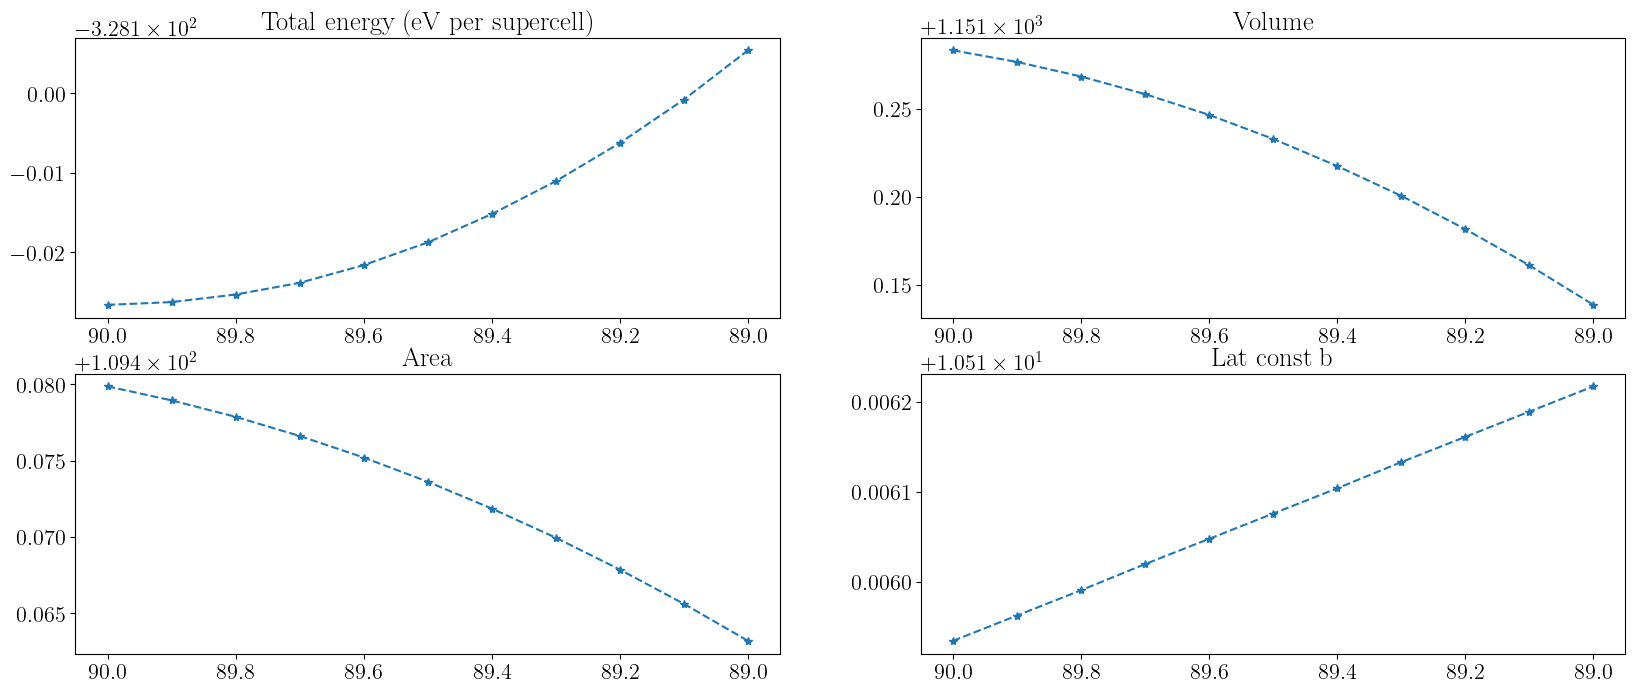

In [296]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/89/rlx/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/89/rlx/{i}/POSCAR"))
    polarization_ac89 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac89.get_polarization_change())
    print(polarization_ac89.get_polarization_change_norm())
ac_angles.append(89)
ac_pols.append(polarization_ac89.get_polarization_change_norm())
angles89ac, energies89ac, lat_b89, areas_ac89, volumes_ac89 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-8.21055186e-04 -4.77996180e-02  1.40863357e-05]]
0.047806670307264695
2 read
[[-9.18470349e-04 -9.42060468e-02  1.45963554e-05]]
0.09421052419810004
3 read
[[-1.02975019e-03 -1.41113842e-01  1.60119755e-06]]
0.14111759893029122
4 read
[[-1.35511689e-03 -1.87799645e-01 -8.28613986e-06]]
0.18780453488383206
5 read
[[-1.22452731e-03 -2.34974100e-01 -9.55137692e-06]]
0.23497729202551818
6 read
[[-1.32199966e-03 -2.81342853e-01 -7.65830412e-06]]
0.28134596024994885
7 read
[[-1.41950933e-03 -3.28397168e-01 -5.42479694e-06]]
0.32840023625111625
8 read
[[-1.53079182e-03 -3.76110424e-01 -1.65816160e-05]]
0.37611354096571237
9 read
[[-1.62836747e-03 -4.23849395e-01 -1.36443219e-05]]
0.42385252529696266
10 read
[[-1.72599423e-03 -4.71873581e-01 -1.03659104e-05]]
0.47187673953544673

[-1.00000e-03  3.85000e-01  7.70000e-01  1.15500e+00  1.53900e+00
  1.92500e+00  9.07882e+02  9.07992e+02  9.08109e+02  9.08232e+02
  9.08360e+02]


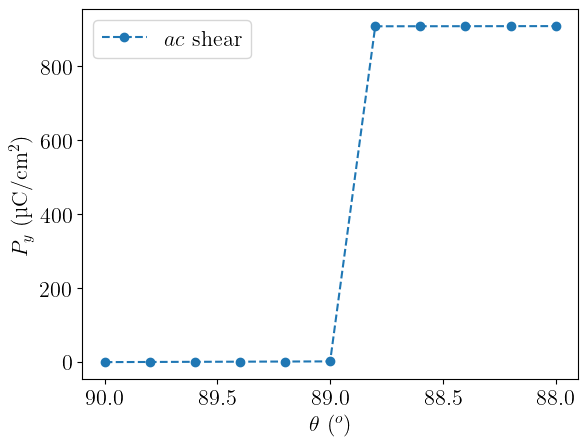

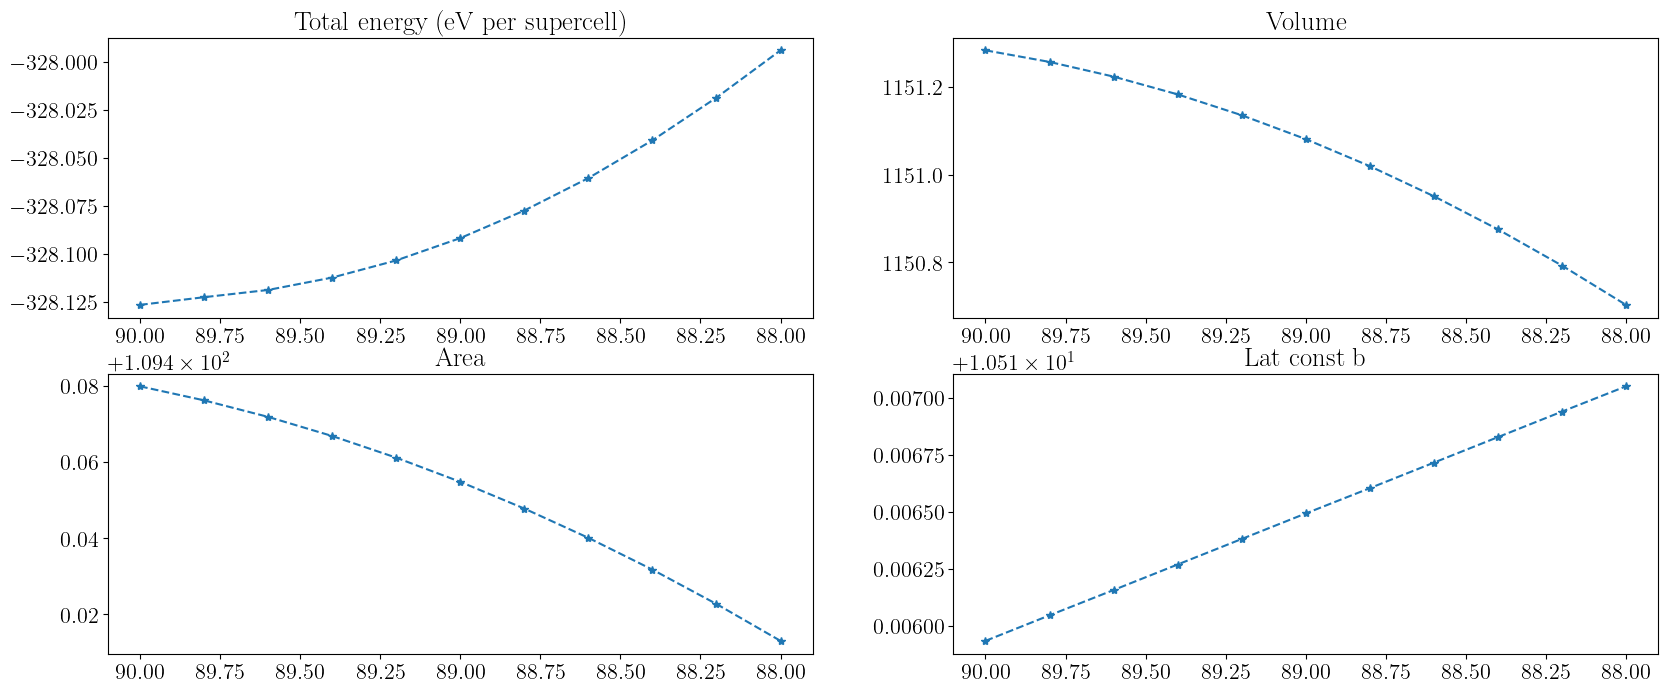

In [297]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/88/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/88/{i}/POSCAR"))
    polarization_ac88 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac88.get_polarization_change())
    print(polarization_ac88.get_polarization_change_norm())
ac_angles.append(88)
ac_pols.append(polarization_ac88.get_polarization_change_norm())
angles88ac, energies88ac, lat_b88, areas_ac88, volumes_ac88 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[ 2.38816063 -1.20614452  6.86231155]]
7.377060100109657
2 does not contain OUTCAR yet
3 read
[[-0.02343911  4.15055503 -0.24647446]]
4.15795473457318
4 read
[[2.65120671 1.71699086 3.3701035 ]]
4.659268388989941
5 read
[[ 0.83269293  2.59296246 -1.54790119]]
3.1217542826626943
6 read
[[ 6.96794341 -3.5914006  -8.63572467]]
11.49982263517495
7 read
[[ 8.82765615 -5.03117774 -5.47059627]]
11.385447144259564
8 read
[[ 6.33517083 -8.27554394 -1.84328166]]
10.537489523734074
9 read
[[ 3.89994008 -8.33330831 -4.27333128]]
10.0670144311603
10 read
[[-2.50772636e-03 -1.51168442e+01  4.87752733e-06]]
15.116844399780168

[-1.00000e-03  1.71300e+00 -2.62800e+00  9.05966e+02  8.90566e+02
  9.11524e+02  8.98460e+02  8.87209e+02  9.02081e+02  9.09043e+02]


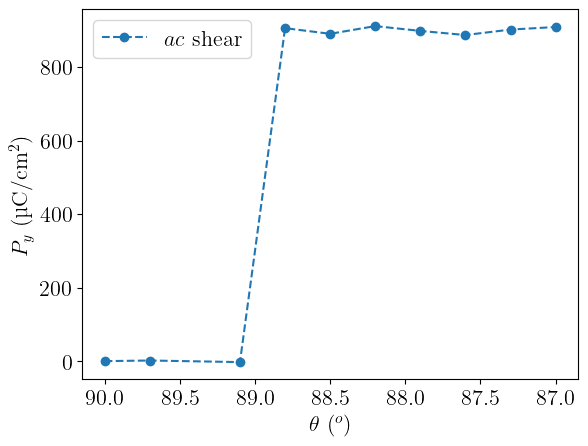

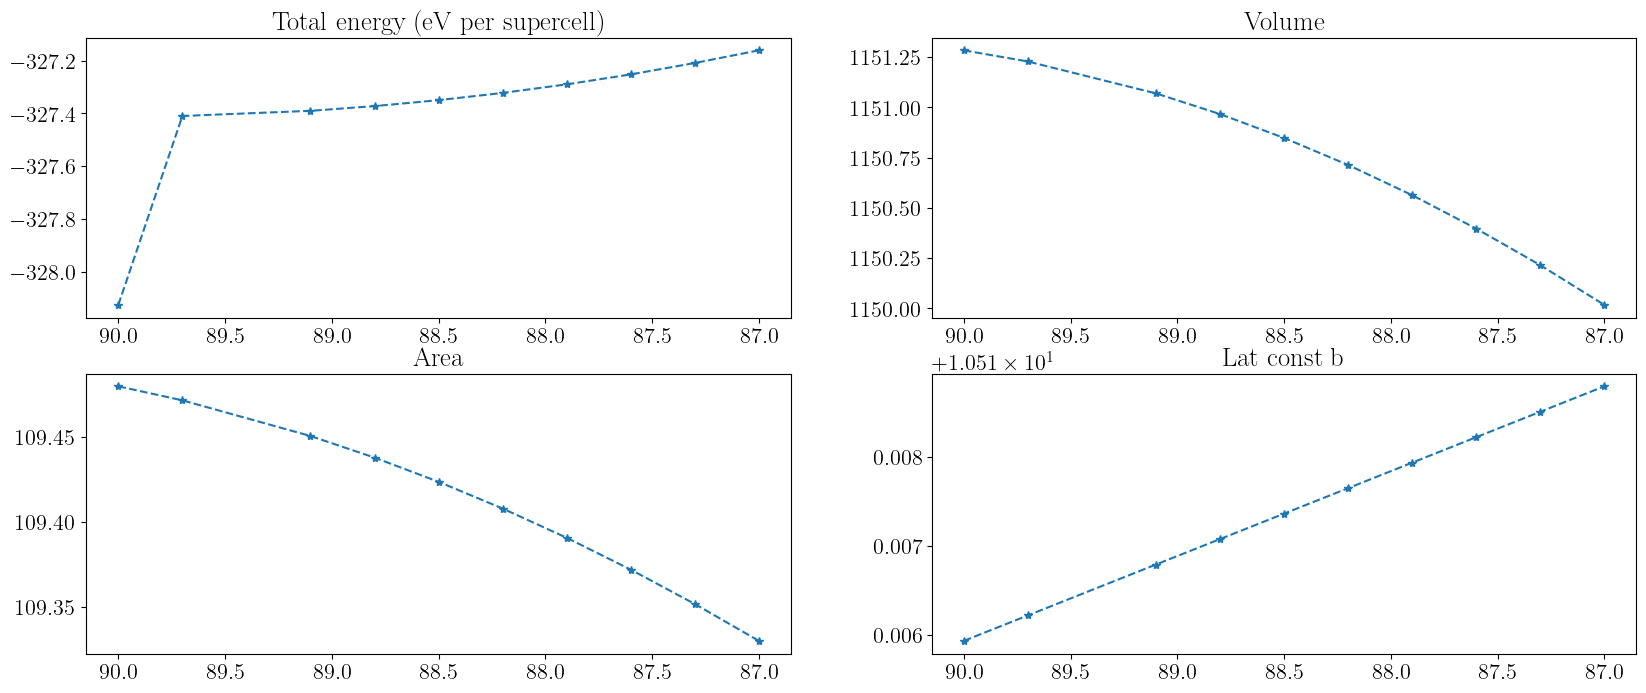

In [298]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/87/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/87/{i}/POSCAR"))
    polarization_ac87 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac87.get_polarization_change())
    print(polarization_ac87.get_polarization_change_norm())
ac_angles.append(87)
ac_pols.append(polarization_ac87.get_polarization_change_norm())
angles87ac, energies87ac, lat_b87, areas_ac87, volumes_ac87 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-9.04466893e-04 -9.53168376e-02 -1.32884857e-05]]
0.09532113056263644
2 read
[[-1.08517154e-03 -1.89495024e-01 -3.92390397e-05]]
0.18949813836692644
3 read
[[-1.26565613e-03 -2.84688369e-01 -7.78625595e-05]]
0.2846912006027486
4 read
[[-1.44619651e-03 -3.80505158e-01 -1.01319606e-04]]
0.38050793016307427
5 read
[[-1.62672824e-03 -4.77277890e-01 -1.23533392e-04]]
0.4772806931351972
6 read
[[-1.80728467e-03 -5.74520350e-01 -1.44506474e-04]]
0.574523229942734
7 read
[[-1.98823939e-03 -6.74129311e-01 -1.50296194e-04]]
0.6741322814113497
8 read
[[-2.16899218e-03 -7.75298043e-01 -1.68785954e-04]]
0.7753011213830232
9 read
[[-2.36426780e-03 -8.78687915e-01 -1.71639891e-04]]
0.8786911410889174
10 read
[[-2.54633444e-03 -9.83376890e-01 -1.59659421e-04]]
0.983380228091434

[-1.00000e-03  7.71000e-01  1.54200e+00  9.08051e+02  9.08335e+02
  9.08642e+02  9.08972e+02  9.09326e+02  9.09705e+02  8.80778e+02
  8.81194e+02]


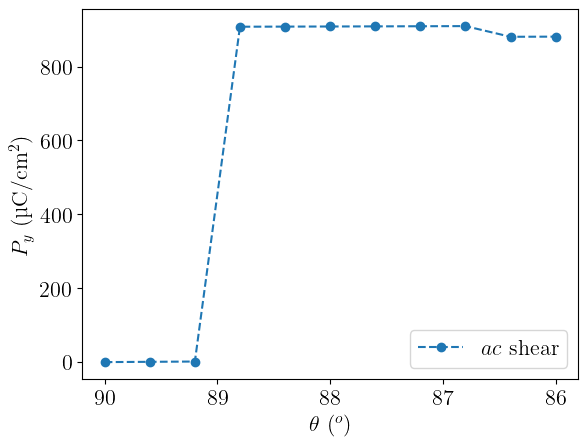

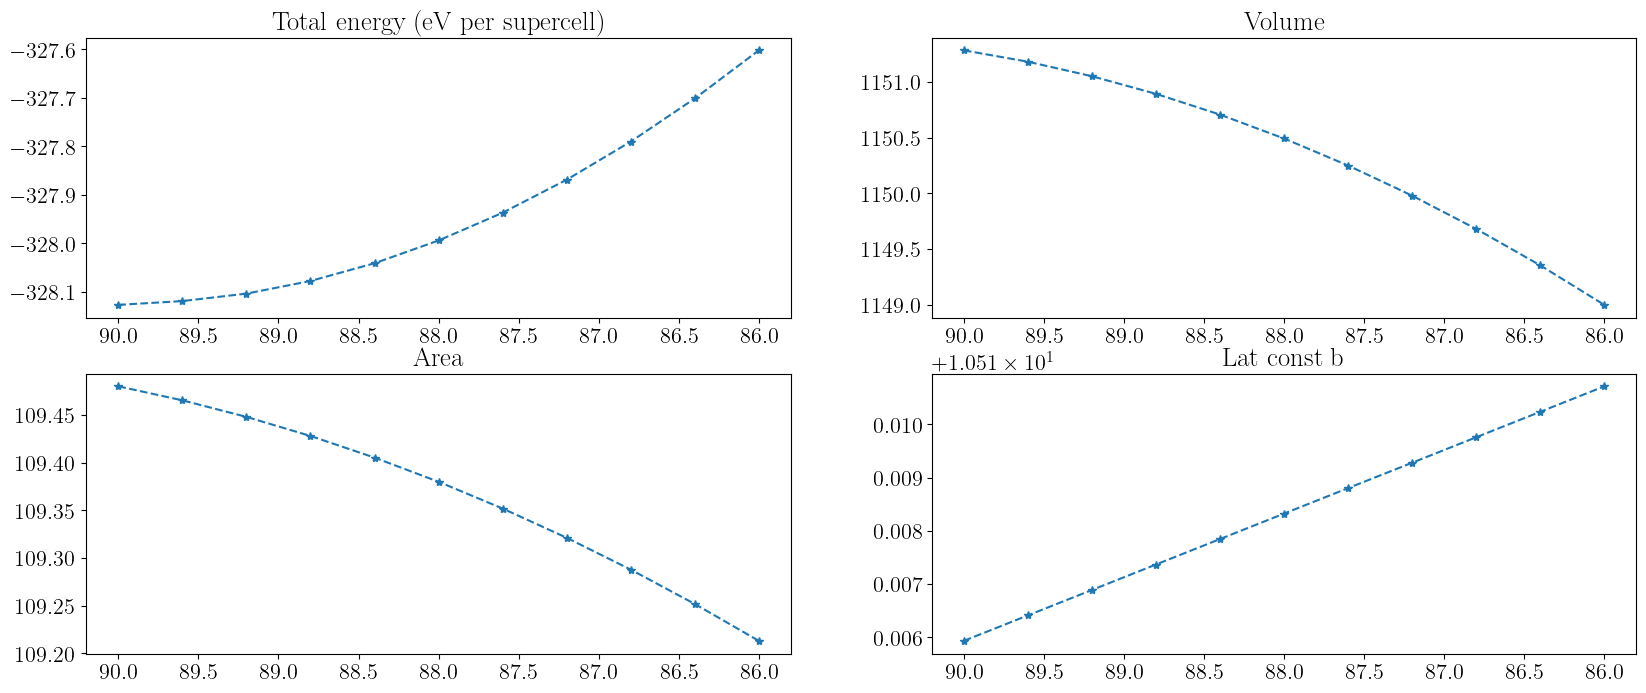

In [299]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/86/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/86/{i}/POSCAR"))
    polarization_ac86 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac86.get_polarization_change())
    print(polarization_ac86.get_polarization_change_norm())
ac_angles.append(86)
ac_pols.append(polarization_ac86.get_polarization_change_norm())
angles86ac, energies86ac, lat_b86, areas_ac86, volumes_ac86 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-9.18259647e-04 -1.21663819e-01 -4.09097407e-05]]
0.12166729380565444
2 read
[[-1.11252475e-03 -2.42283933e-01 -9.40643653e-05]]
0.24228651337487594
3 read
[[-1.30632295e-03 -3.64560810e-01 -1.59488476e-04]]
0.3645631999323023
4 read
[[-1.50001300e-03 -4.87904385e-01 -2.09345529e-04]]
0.48790675773123554
5 read
[[-1.69383256e-03 -6.12684432e-01 -2.43627631e-04]]
0.6126868507339592
6 read
[[-1.88728868e-03 -7.40594849e-01 -2.90220026e-04]]
0.7405973496845483
7 read
[[-2.08110635e-03 -8.71252640e-01 -3.21236873e-04]]
0.871255232046983
8 read
[[-2.27503630e-03 -1.00495772e+00 -3.50624686e-04]]
1.0049604074597644
9 read
[[-2.48366932e-03 -1.14294237e+00 -3.63851320e-04]]
1.1429451836953963
10 read
[[-2.69206636e-03 -1.28500462e+00 -3.89303757e-04]]
1.2850075677098547

[-1.00000e-03  9.61000e-01  1.92200e+00  9.08373e+02  9.08790e+02
  9.09244e+02  9.09736e+02  8.80930e+02  8.81483e+02  8.82075e+02
  8.82705e+02]


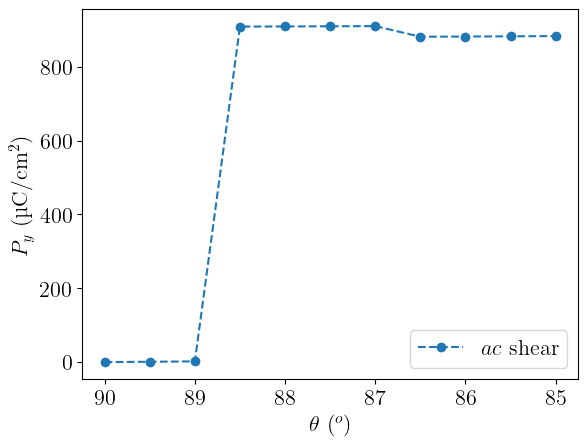

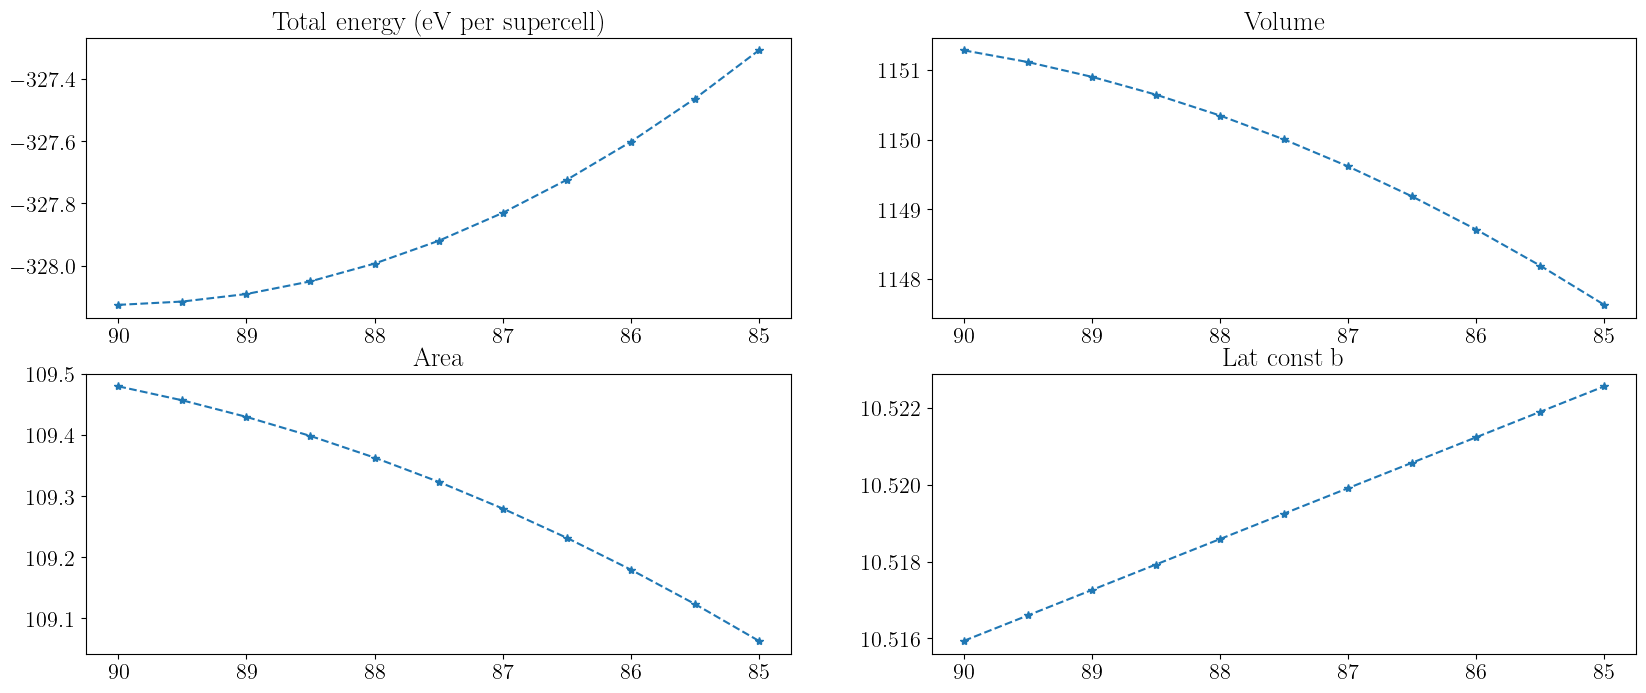

In [300]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/85/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/85/{i}/POSCAR"))
    polarization_ac85 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac85.get_polarization_change())
    print(polarization_ac85.get_polarization_change_norm())
ac_angles.append(85)
ac_pols.append(polarization_ac85.get_polarization_change_norm())
angles85ac, energies85ac, lat_b85, areas_ac85, volumes_ac85 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-9.45923372e-04 -1.49169263e-01 -6.84382525e-05]]
0.14917228241489927
2 read
[[-1.15347637e-03 -2.97397493e-01 -1.62593906e-04]]
0.29739978801816824
3 does not contain OUTCAR yet
4 read
[[-1.56681297e-03 -5.99779827e-01 -3.30756889e-04]]
0.599782000961366
5 read
[[-1.77290977e-03 -7.55697549e-01 -4.04807808e-04]]
0.7556997866945208
6 read
[[-1.99309274e-03 -9.15485803e-01 -4.62442034e-04]]
0.9154881525859944
7 does not contain OUTCAR yet
8 read
[[-2.43396095e-03 -1.25137487e+00 -5.57228171e-04]]
1.2513774510683613
9 read
[[-2.66899083e-03 -1.42892557e+00 -5.93709022e-04]]
1.4289282895135564
10 read
[[-2.91919608e-03 -1.61429127e+00 -6.13096045e-04]]
1.6142941458730695

[-1.00000e-03  1.15100e+00  9.08229e+02  9.09329e+02  9.09959e+02
  8.81297e+02  8.82795e+02  8.83627e+02  8.84517e+02]


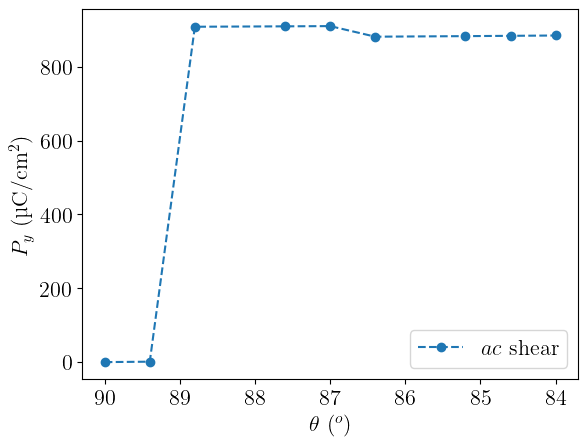

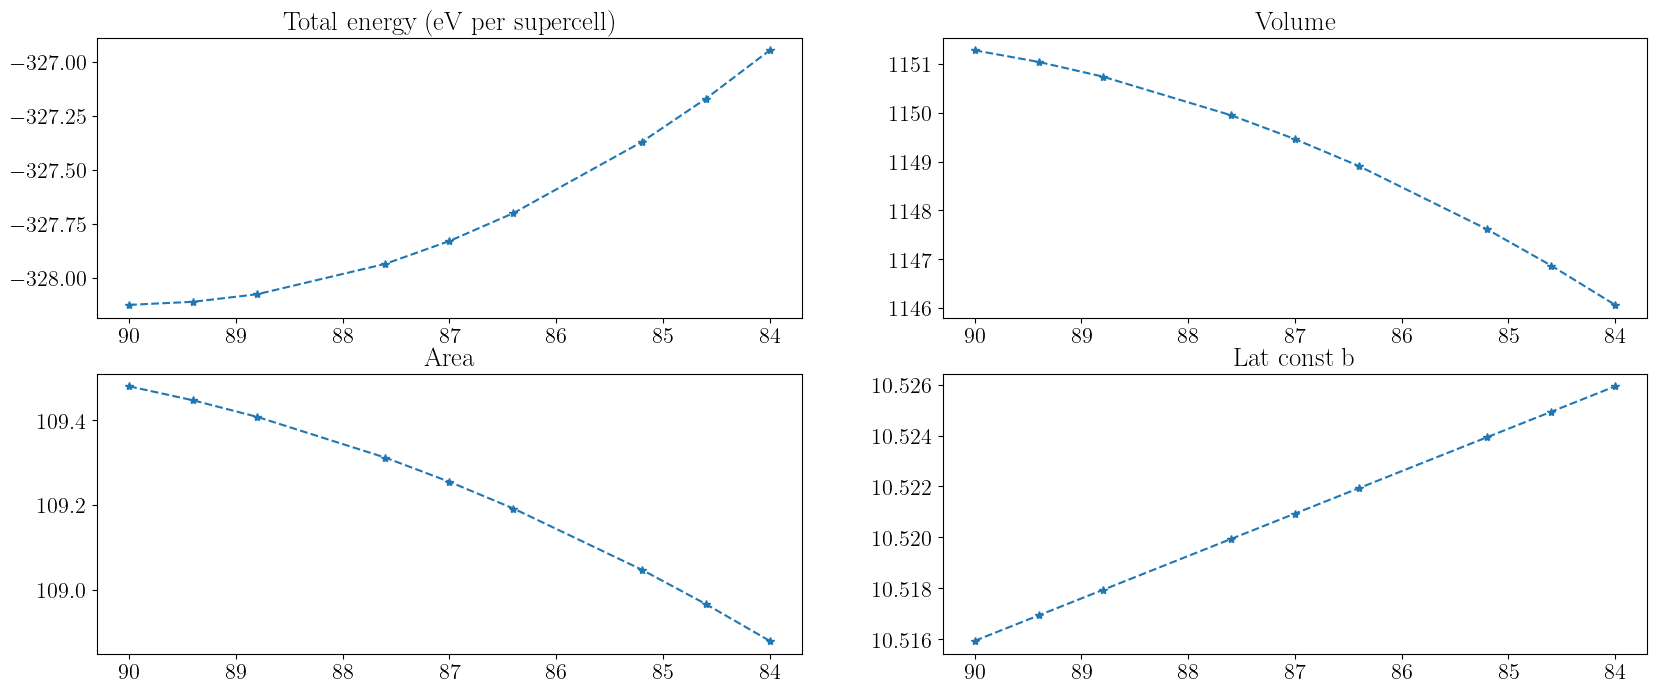

In [301]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/84/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/84/{i}/POSCAR"))
    polarization_ac84 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac84.get_polarization_change())
    print(polarization_ac84.get_polarization_change_norm())
ac_angles.append(84)
ac_pols.append(polarization_ac84.get_polarization_change_norm())
angles84ac, energies84ac, lat_b84, areas_ac84, volumes_ac84 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-9.45617138e-04 -1.77809534e-01 -1.10014352e-04]]
0.1778120897509882
2 read
[[-1.18011584e-03 -3.55868570e-01 -2.45108024e-04]]
0.3558706305418439
3 read
[[-1.39968005e-03 -5.36643034e-01 -3.63835234e-04]]
0.5366450171380729
4 read
[[-1.61860646e-03 -7.21304728e-01 -4.66141353e-04]]
0.721306745625143
5 read
[[-1.83641787e-03 -9.10482395e-01 -5.79969058e-04]]
0.9104845033186183
6 read
[[-2.06849612e-03 -1.10629830e+00 -6.62955690e-04]]
1.1063005188993862
7 read
[[-2.30093497e-03 -1.31059989e+00 -7.29373978e-04]]
1.3106022236655988
8 read
[[-2.54746292e-03 -1.52417738e+00 -7.92527598e-04]]
1.5241798478038118
9 read
[[-2.82311101e-03 -1.74853303e+00 -8.37349882e-04]]
1.7485356585809047
10 read
[[-3.11436987e-03 -1.98505157e+00 -8.64106427e-04]]
1.9850543689401148

[-1.00000e-03  1.34000e+00  9.08503e+02  9.09193e+02  9.09955e+02
  8.81438e+02  8.82326e+02  8.83289e+02  8.84329e+02  8.85447e+02
  8.86646e+02]


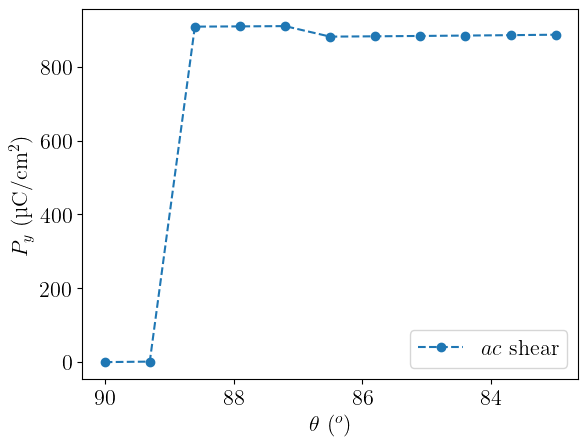

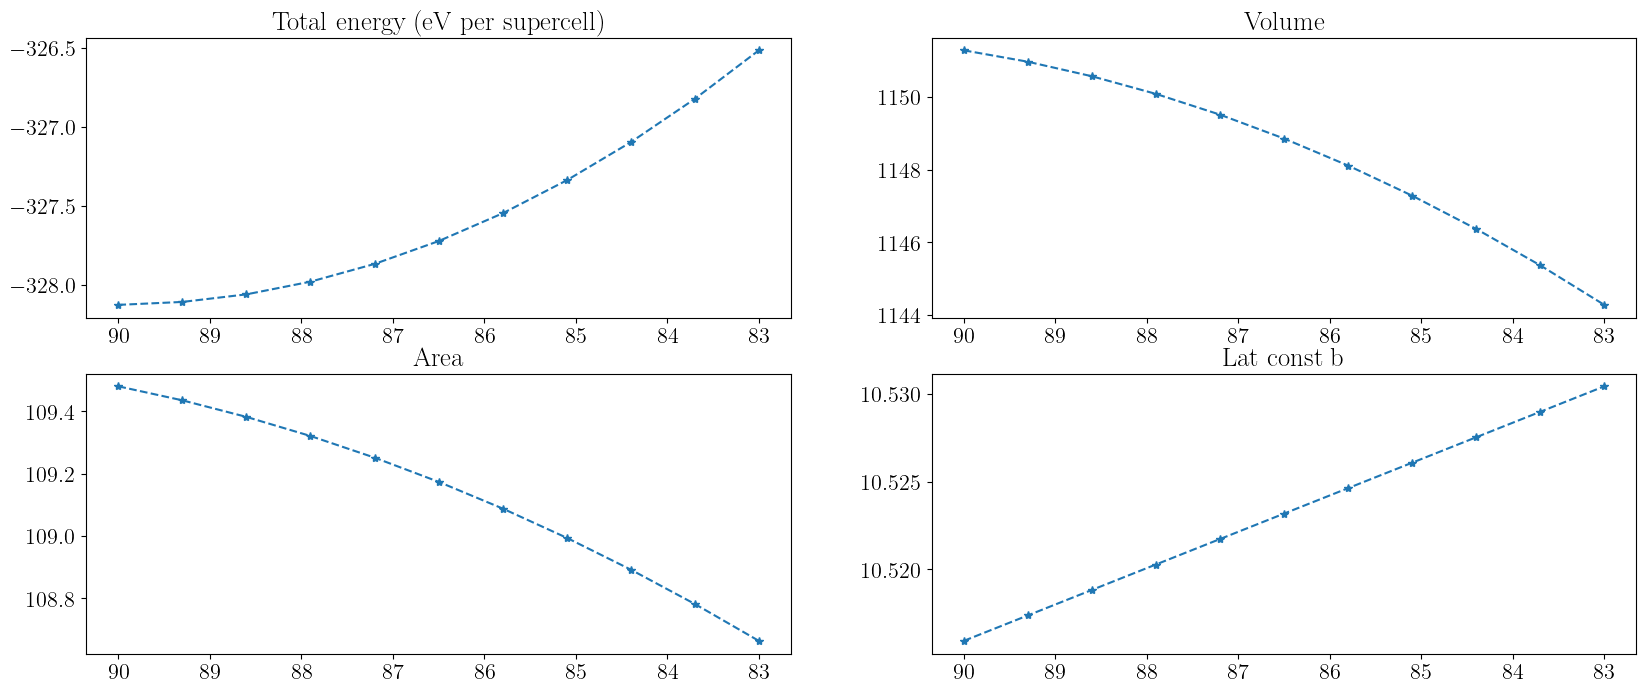

In [304]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/83/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/83/{i}/POSCAR"))
    polarization_ac83 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac83.get_polarization_change())
    print(polarization_ac83.get_polarization_change_norm())
ac_angles.append(83)
ac_pols.append(polarization_ac83.get_polarization_change_norm())
angles83ac, energies83ac, lat_b83, areas_ac83, volumes_ac83 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-9.45143064e-04 -2.07952095e-01 -1.65521186e-04]]
0.20795431878616838
2 read
[[-1.15057043e-03 -4.17307942e-01 -3.42278426e-04]]
0.41730969468358753
3 read
[[-1.35428971e-03 -6.29500459e-01 -5.02533018e-04]]
0.6295021612549544
4 read
[[-1.55634598e-03 -8.47441120e-01 -6.60315270e-04]]
0.8474428744230342
5 read
[[-1.77134704e-03 -1.07382252e+00 -8.01261936e-04]]
1.0738243672169818
6 read
[[-1.98579330e-03 -1.30958134e+00 -9.25695989e-04]]
1.30958329116602
7 read
[[-2.22818876e-03 -1.55712414e+00 -1.03225182e-03]]
1.5571262156481585
8 read
[[-2.48510348e-03 -1.81929911e+00 -1.12109842e-03]]
1.8193013268055331
9 read
[[-2.77120297e-03 -2.09730997e+00 -1.19099989e-03]]
2.0973123351794847
10 read
[[-3.08818787e-03 -2.39474982e+00 -1.22714404e-03]]
2.394752346288534

[-1.00000e-03  1.52900e+00  9.08814e+02  9.09690e+02  9.10663e+02
  8.82357e+02  8.83498e+02  8.84738e+02  8.86082e+02  8.87532e+02
  8.89090e+02]


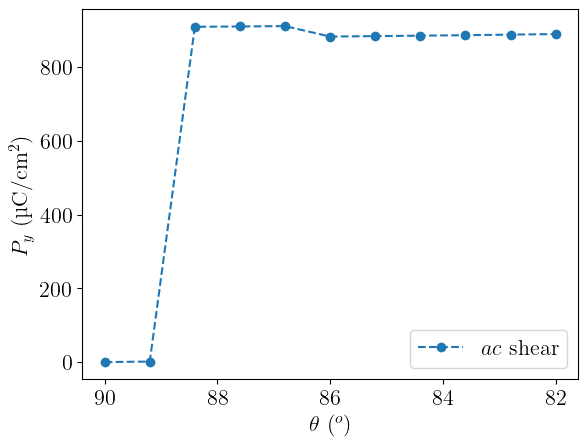

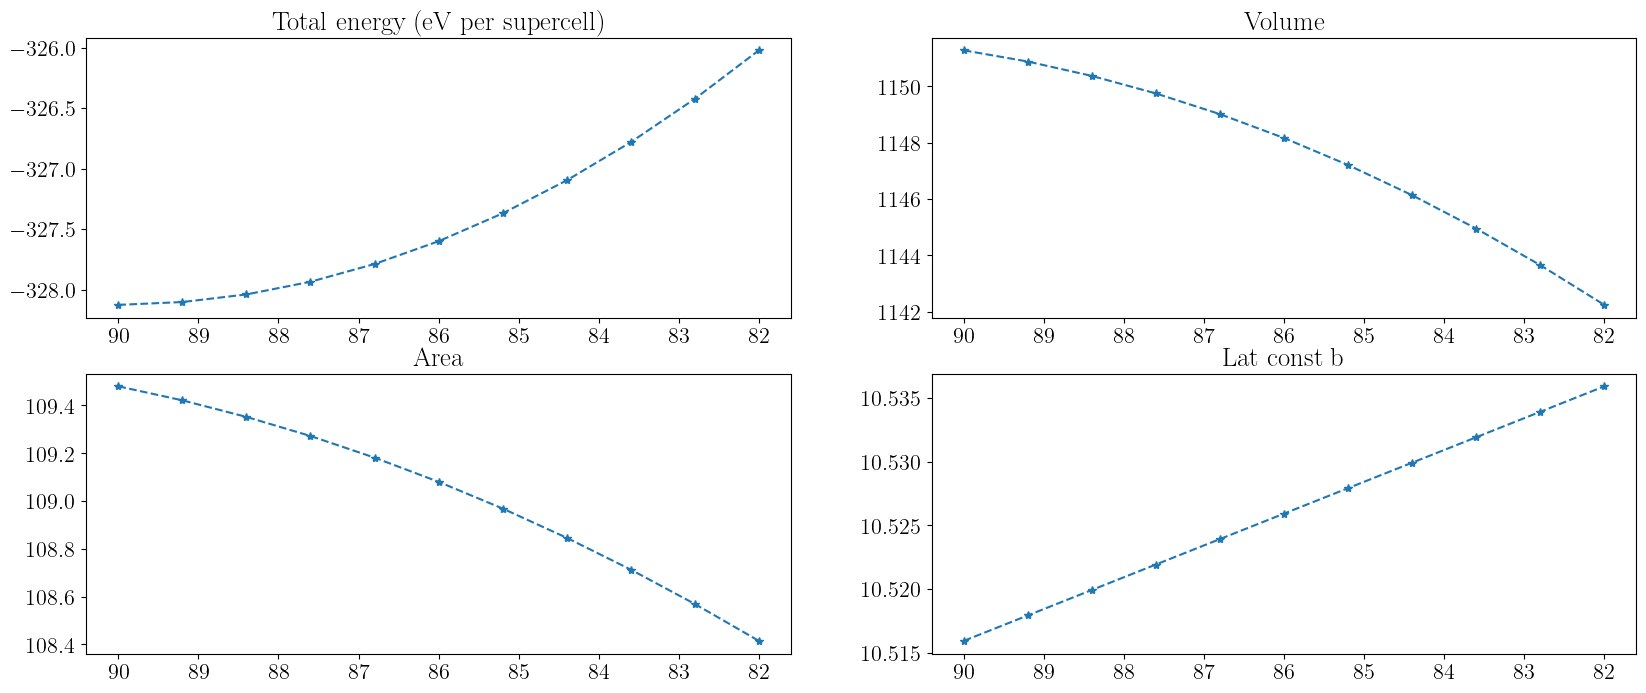

In [305]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/82/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/82/{i}/POSCAR"))
    polarization_ac82 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac82.get_polarization_change())
    print(polarization_ac82.get_polarization_change_norm())
ac_angles.append(82)
ac_pols.append(polarization_ac82.get_polarization_change_norm())
angles82ac, energies82ac, lat_b82, areas_ac82, volumes_ac82 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-9.16732252e-04 -2.39069256e-01 -2.21260300e-04]]
0.23907112938079317
2 read
[[-1.09239027e-03 -4.80410351e-01 -4.67918178e-04]]
0.48041185402989484
3 read
[[-1.25107269e-03 -7.25484575e-01 -6.98737773e-04]]
0.7254860466270995
4 read
[[-1.43510878e-03 -9.79625695e-01 -9.12888348e-04]]
0.9796272558798564
5 read
[[-1.60311714e-03 -1.24441366e+00 -1.11148184e-03]]
1.2444152968709665
6 read
[[-1.79757138e-03 -1.52402262e+00 -1.29296318e-03]]
1.5240243699887805
7 read
[[-2.01991775e-03 -1.81992003e+00 -1.44266615e-03]]
1.8199218957570251
8 read
[[-2.28443441e-03 -2.13624092e+00 -1.57303989e-03]]
2.136242934135592
9 read
[[-2.57990123e-03 -2.47767855e+00 -1.65576033e-03]]
2.4776806934704028
10 read
[[-2.95043305e-03 -2.84537983e+00 -1.68644236e-03]]
2.8453821316221437

[-1.00000e-03  1.71600e+00  9.09159e+02  9.10246e+02  8.82085e+02
  8.83385e+02  8.84812e+02  8.86367e+02  8.88057e+02  8.89886e+02
  8.91857e+02]


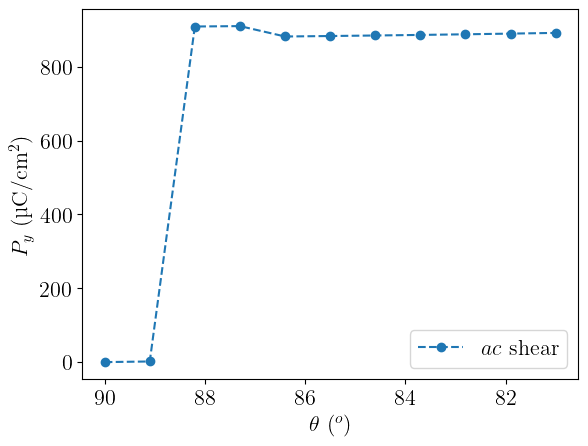

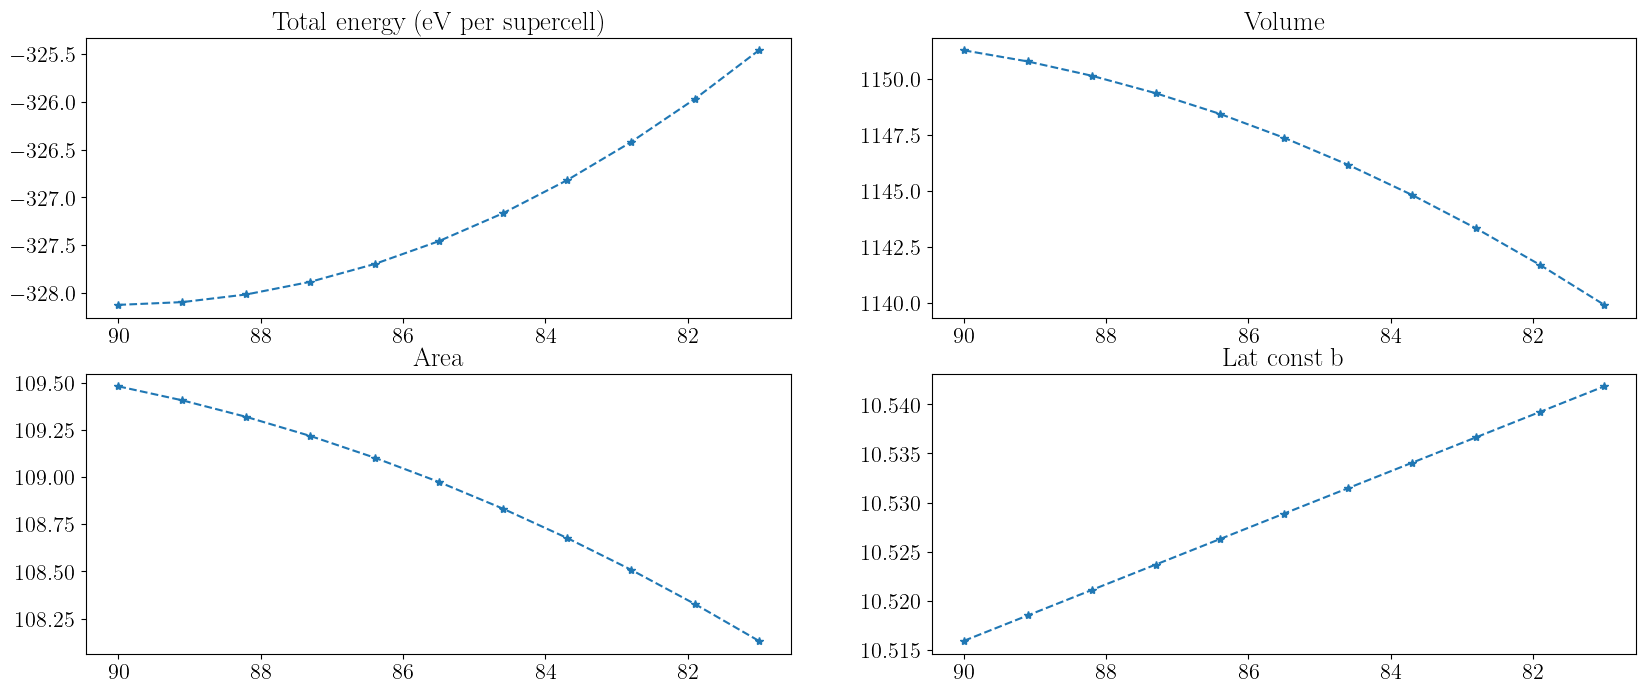

In [307]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/81/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/81/{i}/POSCAR"))
    polarization_ac81 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac81.get_polarization_change())
    print(polarization_ac81.get_polarization_change_norm())
ac_angles.append(81)
ac_pols.append(polarization_ac81.get_polarization_change_norm())
angles81ac, energies81ac, lat_b81, areas_ac81, volumes_ac81 = pol_plot_ac(structsAC, outcarsAC)

1 read
[[-0.00090215 -0.27346899 -0.00027694]]
0.27347062936852884
2 read
[[-0.00104769 -0.54795179 -0.00059359]]
0.5479531576679659
3 read
[[-0.00120296 -0.83054192 -0.00088028]]
0.8305433282330028
4 read
[[-0.00135442 -1.12355701 -0.0011513 ]]
1.1235585091476121
5 read
[[-1.51722133e-03 -1.43311707e+00 -1.39225339e-03]]
1.4331186808823129
6 does not contain OUTCAR yet
7 read
[[-1.93632985e-03 -2.11397924e+00 -1.79334721e-03]]
2.1139810830714185
8 read
[[-2.22511566e-03 -2.49467024e+00 -1.92149825e-03]]
2.4946722068407317
9 read
[[-2.57515979e-03 -2.90965064e+00 -1.98456945e-03]]
2.909652730042347
10 read
[[-3.03054417e-03 -3.36393080e+00 -1.99089975e-03]]
3.3639330662130744

[-1.00000e-03  1.90200e+00  9.09542e+02  9.10864e+02  8.82943e+02
  8.84533e+02  8.88192e+02  8.90273e+02  8.92532e+02  8.94975e+02]


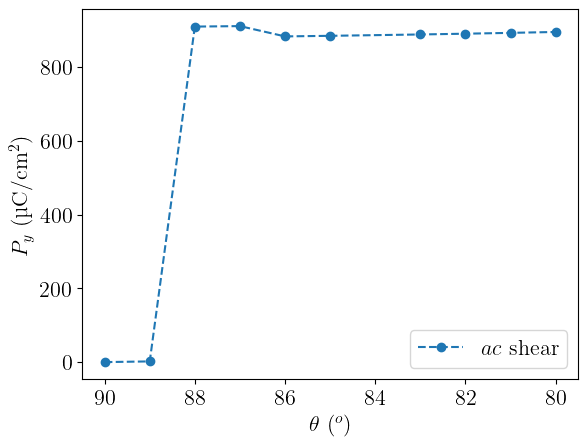

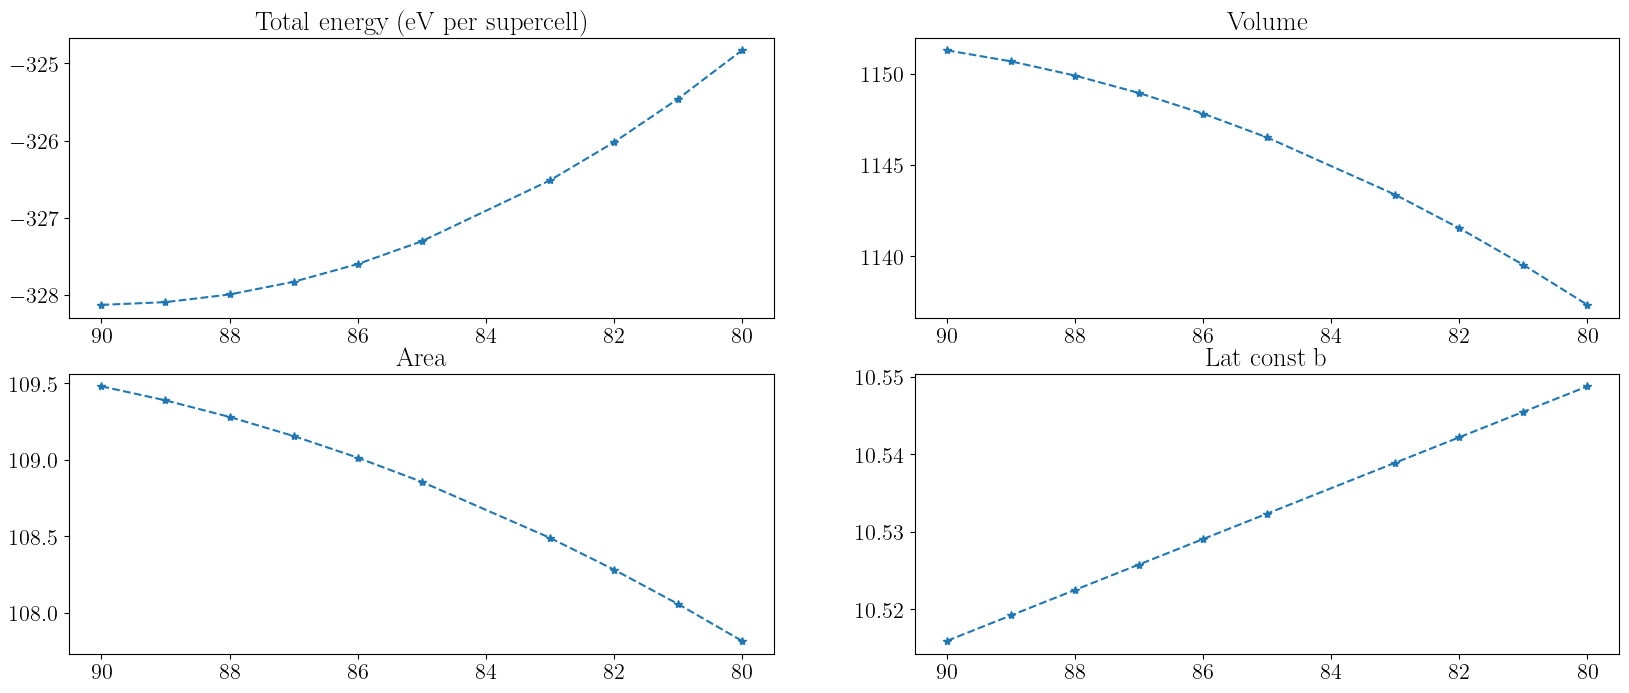

In [308]:
outcarsAC = [Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/OUTCAR")]
structsAC = [Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/collin/CONTCAR")]
for i in range(1,11):
    try:
        outcarsAC.append(Outcar(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/80/{i}/OUTCAR"))
    except FileNotFoundError:
        print(f"{i} does not contain OUTCAR yet")
        continue
    print(i, "read")
    structsAC.append(Structure.from_file(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A221/shear/ac/80/{i}/POSCAR"))
    polarization_ac80 = Polarization.from_outcars_and_structures(outcarsAC, structsAC, calc_ionic_from_zval=True)
    print(polarization_ac80.get_polarization_change())
    print(polarization_ac80.get_polarization_change_norm())
ac_angles.append(80)
ac_pols.append(polarization_ac80.get_polarization_change_norm())
angles80ac, energies80ac, lat_b80, areas_ac80, volumes_ac80 = pol_plot_ac(structsAC, outcarsAC)

In [662]:
ac_pols = [0, 0.2369, 0.4719, 0.7169, 0.9853, 1.285, 1.6143, 1.9851, 2.3948, 2.8454, 3.3639]

In [681]:
ac89_pols = [0, 0.195, 0.39, 0.586, 0.781, 0.9770, 1.171, 1.367, 1.562, 1.758, 1.953]
angles89 = [90, 89.9, 89.8, 89.7, 89.6, 89.5, 89.4, 89.3, 89.2, 89.1, 89]

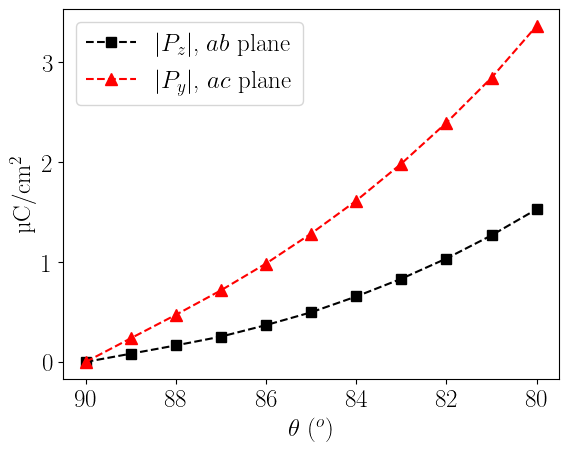

In [615]:
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
        "font.weight": "normal",
        "font.style": "normal",
    "mathtext.default": "regular"
    })

fig, ax = plt.subplots()
ax.plot(ab_angles, ab89_pols, 'ks--', markersize="7", label='$|P_z|$, $ab$ plane')
ax.plot(ab_angles, ac89_pols, 'r^--', markersize="9", label='$|P_y|$, $ac$ plane')
#ax.plot(angles, pols_bc, 'b^--', markersize="7", label='$|P_x|$, $yz$ shear')
ax.set_xlabel('$\\theta$ ($^o$)')
ax.set_ylabel('µC/cm$^2$')
ax.invert_xaxis()
plt.legend()
#plt.savefig("polarization_80_90_ab_ac.pdf", format="pdf", bbox_inches="tight")

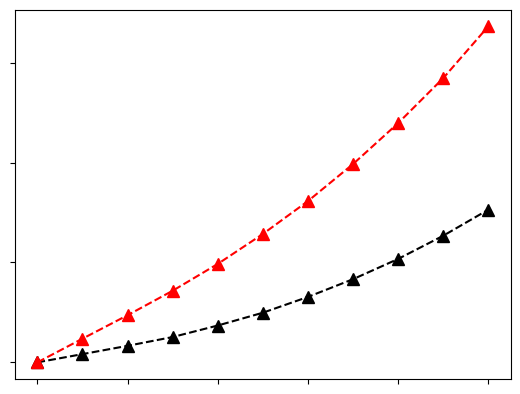

In [676]:
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
        "font.weight": "normal",
        "font.style": "normal",
    "mathtext.default": "regular"
    })

ab_angles = [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80]
ab_pols = [0, 0.0823, 0.1654, 0.2534,  0.3687, 0.4968, 0.6550, 0.8326, 1.0353, 1.2675, 1.5283]
ac_pols = [0, 0.2369, 0.4719, 0.7169, 0.9853, 1.285, 1.6143, 1.9851, 2.3948, 2.8454, 3.3639]

fig, ax = plt.subplots()
ax.plot(ab_angles, ab_pols, 'k^--', markersize="9", label='$|P_z|$, $ab$ shear')
ax.plot(ab_angles, ac_pols, 'r^--', markersize="9", label='$|P_y|$, $ac$ shear')

#ax.set_xlabel('$\\theta$ ($^o$)')
#ax.set_ylabel('$|P_i|$ (µC/cm$^2$)')
ax.invert_xaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#plt.legend()
plt.savefig("polarization_80_90_nolegend.pdf", format="pdf", bbox_inches="tight")

         2
0.01588 x + 0.1702 x + 0.03876
           3           2
0.0009688 x + 0.00135 x + 0.2256 x + 0.003878


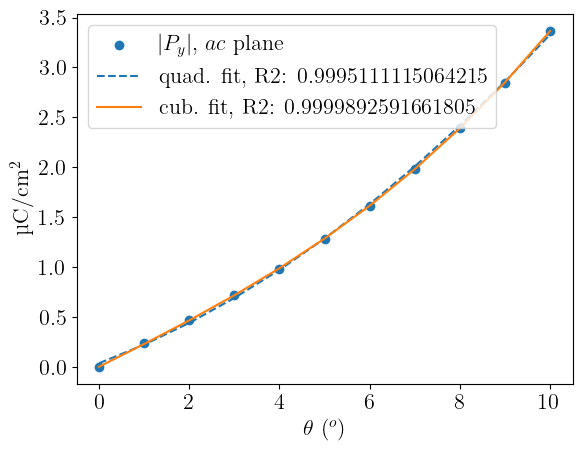

In [390]:
#ax.plot(ab_angles, ac_pols, 'ro--', markersize="9", label='$|P_y|$, $ac$ plane')

# degree 2 and 3 polynomial fit
polyline = np.linspace(0, 10, 11)
model_ac2 = np.poly1d(np.polyfit(polyline, ac_pols, 2))
model_ac3 = np.poly1d(np.polyfit(polyline, ac_pols, 3))

plt.scatter(polyline, ac_pols, label='$|P_y|$, $ac$ plane')
plt.plot(polyline, model_ac2(polyline), '--', label=f'quad. fit, R2: {r2_score(ac_pols, model_ac2(polyline))}')
plt.plot(polyline, model_ac3(polyline), label=f'cub. fit, R2: {r2_score(ac_pols, model_ac3(polyline))}')
plt.xlabel('$\mathrm{\\theta}$ ($^o$)')
plt.ylabel('µC/cm$^2$')
plt.legend()
print(model_ac2)
print(model_ac3)